In [1]:
# 1

########## 6 December 2018 - Alec S. Hirschauer ##########
# This will be the definitive iPython notebook for identifying
# AGB star candidates in NGC 6822 using a K vs J-K CMD with data
# from the Sibbons et al. (2012) WFCAM/UKIRT catalog.
#
# Future notebooks will be based on this one, but will tackle
# different CMDs, in particular [3.6] vs J-[3.6] and
# [8.0] vs [3.6]-[8.0].
#
# The various populations include:
# (1) O-rich/M-type AGB star candidates
# (2) C-rich/C-type AGB star candidates
# (3) the first dusty track of O-rich AGB stars
# (4) extremely dusty sources (included with C-types)
#
# This will be accomplished by determining first the TRGB,
# which Cioni & Habing (2005) says is at K_s = 17.10 +/- 0.01
# but Sibbons et al. (2012) says is at K_0 = 17.41 +/- 0.11.
#
# I will employ histograms fit with KDE Gaussians to find the
# local minima inflection point over the relevant range of data.
#
# This technique will then also be used to determine the color cuts
# between the various populations as measured by histograms of
# optimum bin width as determined by Knuth's Algorithm.

In [2]:
# 2

# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This line is necessary for the number density histograms.
from astropy import stats
from astropy.stats.histogram import knuth_bin_width
# This line is necessary for determining histogram bin width.

In [3]:
# 3

# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDKhanANDSibbonsHOME_ahirschauer.csv')
# This is a table of values with 30,745 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to sources from Sibbons et al. (2012)
# with an "OR" command, then downloaded from MAST CasJobs.
# print phot_data
#
# Also I'll read in the entire Sibbons+ stellar source catalog.
Sibbons_data = pd.read_csv('Sibbons2012NGC6822.csv')
# This is for a test of the histogram(s) I make later on.

In [4]:
# 4

# For the histograms, I have created new .csv files which have the specific colors'
# information: ID, RA, Dec, magnitudes, magnitude errors, color, color error.
#
# I have pre-trimmed the bogus data from these tables already, so there's no need
# to get rid of the whacky 'null' values converted to "-9999" values
# (which, when subtracted from any other value, gives another bogus value)
# like I did in the previous cell with the "full" catalog.
#
jMINUSkDATA = pd.read_csv('jMINUSk.csv')
jMINUSthreesixDATA = pd.read_csv('jMINUSthreesix.csv')
threesixMINUSeightzeroDATA = pd.read_csv('threesixMINUSeightzero.csv')
jMINUSeightzeroDATA = pd.read_csv('jMINUSeightzero.csv')
#
# After comparing cells where I made CMDs with the "filter_phot_data" data and with
# the specific colors' information above, I have found that they are the same!
# I will use these data instead of calling from the larger catalog.
#
# These two were made following a meeting with Margaret on 2 October 2018.
eightzeroMINUStwentyfourDATA = pd.read_csv('eightzeroMINUStwentyfour.csv')
fourfiveMINUSeightzeroDATA = pd.read_csv('fourfiveMINUSeightzero.csv')
#
# NB: the bin width routine Libby sent me had previously produced values that were
# clearly too big, which is probably due to "NULL" or "-9999" values in the inputs.
#________________
#
# update (27 Nov 2018): uploaded a jMINUSk .csv file
# that has been trimmed of all sources with magnitude
# errors greater than 0.1, as a test for optimum
# histogram bin width calculations later.
jMINUSkDATA_test = pd.read_csv('jMINUSk_test.csv')

In [5]:
# 5

# The first thing I'll do here is make the J vs J-K CMD & Hess diagram.

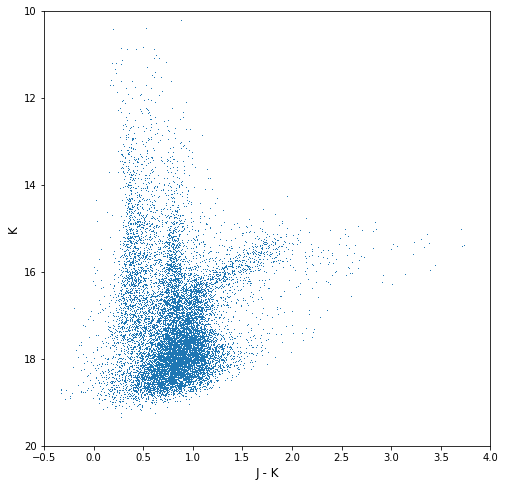

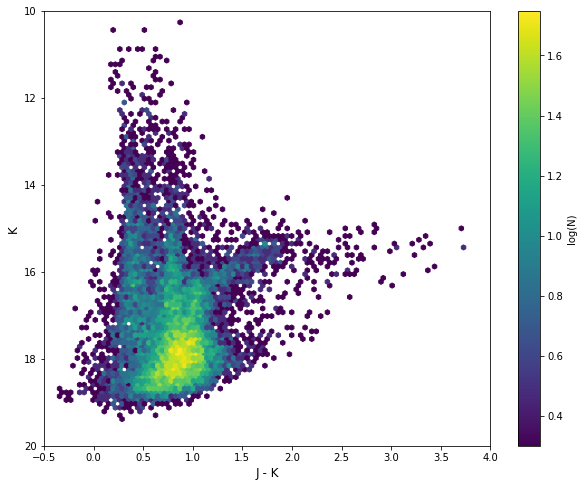

In [6]:
# 6

# K vs J-K
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
im1 = ax1.hexbin(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, 20.0, 10.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_J-K_hist.pdf')

In [7]:
# 7

# The second thing I'll do is determine where the TRGB should be.
#
# Sibbons et al. (2012) determined it to be at K_0 = 17.41 +/- 0.11,
# and since I'm using their data that seems like a good starting point.
#
# To do so, I'll isolate only the photometric data of sources with
# errors in the magnitudes less than 0.1.

low_error_jMINUSkDATA = jMINUSkDATA[(jMINUSkDATA.eJmag < 0.1) & (jMINUSkDATA.eKmag < 0.1)]

# And as a check, see what the number of sources is for the entire catalog
# versus the number of sources in this trimmed catalog.

print len(jMINUSkDATA)
print len(low_error_jMINUSkDATA)

13351
8504


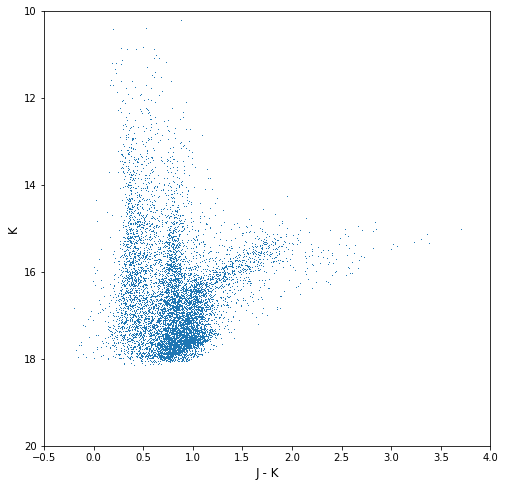

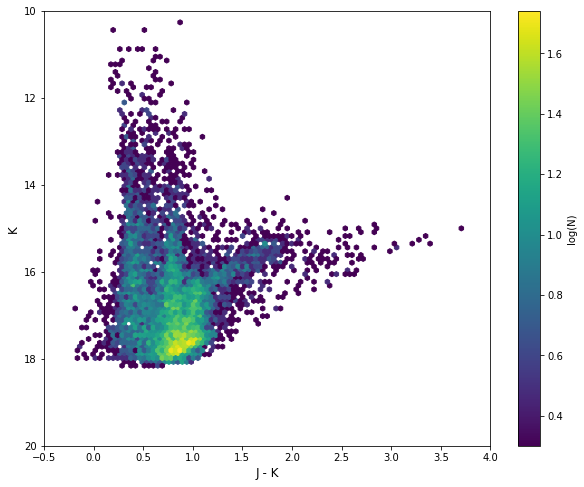

In [8]:
# 8

# With my catalog of only low-error photometry sources, I'll make a
# new CMD and Hess diagram just to see how the data look now.

# K vs J-K (low error)
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(low_error_jMINUSkDATA.jMINUSk, low_error_jMINUSkDATA.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
#plt.xlim(0.5, 1.5)
#plt.ylim(18.0, 16.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
#plt.xlim(0.5, 1.5)
#plt.ylim(18.0, 16.0)
im1 = ax1.hexbin(low_error_jMINUSkDATA.jMINUSk, low_error_jMINUSkDATA.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, 20.0, 10.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_J-K_hist.pdf')

In [9]:
# 9

# Definitely looks cleaner than before.
#
# I'll use this trimmed catalog to develop the color cuts themselves,
# but the full catalog when I'm doing the actual source identification.

5447
0.1235312499999992
147.91828990640116


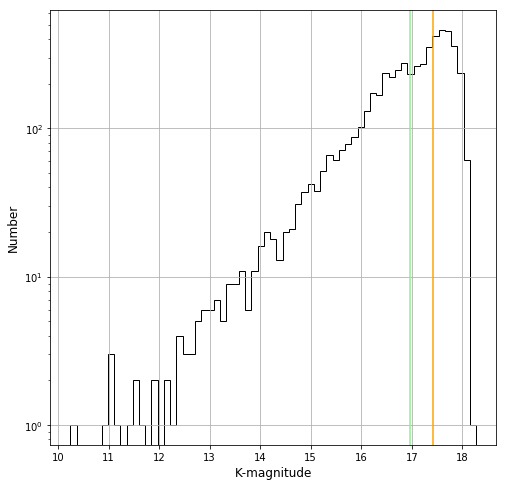

In [10]:
# 10

# In order to determine where the TRGB should be, I'll isolate the
# data between J-K = 0.6 and 1.2, where the majority of the relevant
# sources are, and make a vertical histogram of these points.
#
# Wherever there appears to be an inflection point in the KDE
# is where I'll say the boundary line should be.
#
# Here I'm making a list of sources in this restricted J-K range,
# plus a calculation of how many sources are included.

TRGB_hist = low_error_jMINUSkDATA[(low_error_jMINUSkDATA.jMINUSk < 1.2)
                                 & (low_error_jMINUSkDATA.jMINUSk > 0.6)]

print len(TRGB_hist)

# Next I'll compute the optimum bin width using Knuth's Algorithm
# over which the histogram will plot the data, then print out this
# value and the number of bins that will be implemented.

binwidth = (stats.knuth_bin_width(TRGB_hist.Kmag))
bin_number = (max(TRGB_hist.Kmag)+binwidth)/binwidth

print binwidth
print bin_number

# Finally, here's the histogram of the relevant data:

fig = plt.figure(figsize = (8,8))
plt.hist(TRGB_hist.Kmag, bins=np.arange(min(TRGB_hist.Kmag), max(TRGB_hist.Kmag) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(16.0, 18.0)
#plt.ylim(100.0, 1000.0)
plt.xlabel('K-magnitude', size=12)
plt.ylabel('Number', size=12)
plt.axvline(x=17.41, linewidth=1.5, color='orange') # Sibbons+ (2012) TRGB value
plt.axvline(x=16.955, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('K_vs_J-K_TRGB_histogram.pdf')

/Users/ahirschauer/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


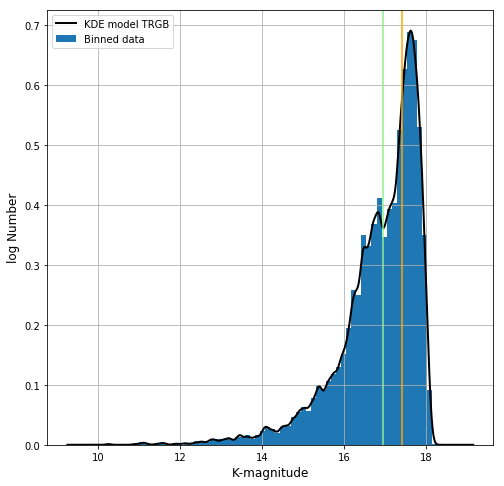

In [11]:
# 11

# I included the orange line at K_0 = 17.41, the TRGB limit as defined
# by Sibbons+ (2012).
#
# By eye, it doesn't appear to match the local minimum, and the KDE
# analysis below will show that explicitly.

kde_data_TRGB = TRGB_hist.Kmag.values
bins=np.arange(min(kde_data_TRGB ), max(kde_data_TRGB ) + binwidth, binwidth)
x_eval_TRGB = np.linspace(kde_data_TRGB.min() - 1.0, kde_data_TRGB.max() + 1.0, 500)
kde_TRGB = gaussian_kde(kde_data_TRGB,bw_method=binwidth/2.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval_TRGB, kde_TRGB(x_eval_TRGB),'k',lw=2,label='KDE model TRGB')
plt.hist(kde_data_TRGB,bins=bins,normed=True,label='Binned data')
#plt.xlim(16.92, 16.98)
#plt.ylim(0.36, 0.37)
plt.legend()
plt.xlabel('K-magnitude', size=12)
plt.ylabel('log Number', size=12)
plt.axvline(x=17.41, linewidth=1.5, color='orange') # Sibbons+ (2012) TRGB value
plt.axvline(x=16.955, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('K_vs_J-K_KDE.pdf')

In [12]:
# 12

# Based on the KDE analysis
# (using optimum binwidths, then optimum bin widths divided by two
# in order to enhance clarity of location of the local minimum),
# my TRGB determination is at K_0 = 16.955.
#
# This value is consistent even if I change the J-K values over
# which the histogram is binned, so I feel good about it.
#
# K_0 = 16.955 is a bit different than K_0 = 17.41, however,
# so I'll have to keep an eye out.
#
# By being higher on the CMD, this boundary will reject more points
# than the Sibbons+ TRGB value, which is the opposite effect I wanted
# based on Sundar's comment that the Sibbons TRGB value rejects
# some AGB stars which "dip below the line".
#
# Alternatively, this value is pretty close to the Cioni & Habing (2005)
# value of K_s = 17.10 (where K_s is more or less the same as K_0).

In [13]:
# 13

# The third thing I'll do is start constructing the vertical bins
# over which the color-cut values will be estimated.
#
# I'll need to determine the optimum bin width, so I'll make another
# list of sources, with photometric errors less than 0.1
# and above the TRGB limit of K_0 = 16.955.

color_cuts = low_error_jMINUSkDATA[(low_error_jMINUSkDATA.Kmag < 16.955)]
color_cuts_alt = low_error_jMINUSkDATA[(low_error_jMINUSkDATA.Kmag < 17.41)]

print len(jMINUSkDATA)
print len(low_error_jMINUSkDATA)
print len(TRGB_hist)
print len(color_cuts)
print len(color_cuts_alt)

# The number of sources are printed here as well, in the following lists:
# (1) all data
# (2) all data with photometric errors less than 0.1
# (3) all data with photometric errors less than 0.1 and between J-K = 0.6 to 1.2
# (4) all data with photometric errors less than 0.1 and above K_0 = 16.955
# (5) all data with photometric errors less than 0.1 and above K_0 = 17.41

13351
8504
5447
4603
6040


In [14]:
# 14

# Based on the list of sources determined from the above cell, the catalog
# "color_cuts" will be used to determine the optimum bin width for the
# successive vertical bins for J-K histograms of decreasing K-magnitude,
# starting at the TRGB limit at K_0 = 16.955

binwidth = (stats.knuth_bin_width(color_cuts.Kmag))
bin_number = (max(color_cuts.Kmag)+binwidth)/binwidth

print binwidth
print bin_number

0.13837499999999991
123.52213188798562


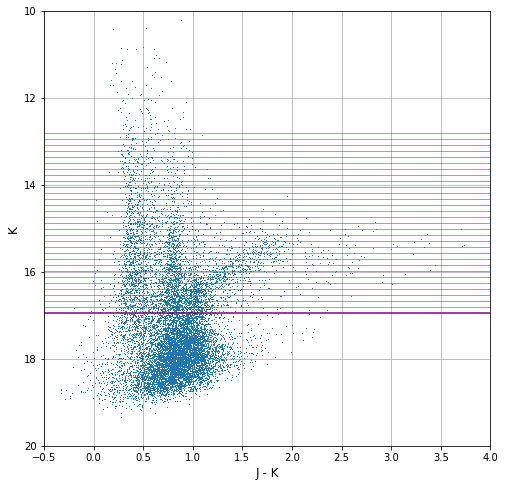

In [15]:
# 15

# I will now contruct bins of width = 0.138 dex from K_0 = 16.955,
# building as many as I need to reach a limit of brightness which
# I am semi-arbitrarily setting at K_0 = 14 (I'll need 28 bins).
#
# Also, I'll keep track of the number of sources in each bin
# so that if/when I need to double/triple/quadruple the bin sizes
# to recover the statistics, I can do so.
#
# Here is the K vs J-K CMD with the established boundary lines:

plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.955, linewidth=1.5, color='purple') # TRGB threshold
plt.axhline(y=16.817, linewidth=0.5, color='green') # Bin  1
plt.axhline(y=16.679, linewidth=0.5, color='green') # Bin  2
plt.axhline(y=16.541, linewidth=0.5, color='green') # Bin  3
plt.axhline(y=16.403, linewidth=0.5, color='green') # Bin  4
plt.axhline(y=16.265, linewidth=0.5, color='green') # Bin  5
plt.axhline(y=16.127, linewidth=0.5, color='green') # Bin  6
plt.axhline(y=15.989, linewidth=0.5, color='green') # Bin  7
plt.axhline(y=15.851, linewidth=0.5, color='green') # Bin  8
plt.axhline(y=15.713, linewidth=0.5, color='green') # Bin  9
plt.axhline(y=15.575, linewidth=0.5, color='green') # Bin 10
plt.axhline(y=15.437, linewidth=0.5, color='green') # Bin 11
plt.axhline(y=15.299, linewidth=0.5, color='green') # Bin 12
plt.axhline(y=15.161, linewidth=0.5, color='green') # Bin 13
plt.axhline(y=15.023, linewidth=0.5, color='green') # Bin 14
plt.axhline(y=14.885, linewidth=0.5, color='green') # Bin 15
plt.axhline(y=14.747, linewidth=0.5, color='green') # Bin 16
plt.axhline(y=14.609, linewidth=0.5, color='green') # Bin 17
#
plt.axhline(y=14.471, linewidth=0.5, color='green') # Bin 18 <- start double-wide bins
plt.axhline(y=14.333, linewidth=0.5, color='green') # Bin 19
plt.axhline(y=14.195, linewidth=0.5, color='green') # Bin 20
plt.axhline(y=14.057, linewidth=0.5, color='green') # Bin 21
plt.axhline(y=13.919, linewidth=0.5, color='green') # Bin 22
#
plt.axhline(y=13.781, linewidth=0.5, color='green') # Bin 23 <- start triple-wide bins
plt.axhline(y=13.643, linewidth=0.5, color='green') # Bin 24
plt.axhline(y=13.505, linewidth=0.5, color='green') # Bin 25
plt.axhline(y=13.367, linewidth=0.5, color='green') # Bin 26
plt.axhline(y=13.229, linewidth=0.5, color='green') # Bin 27
plt.axhline(y=13.091, linewidth=0.5, color='green') # Bin 28
plt.axhline(y=12.953, linewidth=0.5, color='green') # Bin 29
plt.axhline(y=12.815, linewidth=0.5, color='green') # Bin 30
#
plt.grid(True)
plt.show()
plt.close()

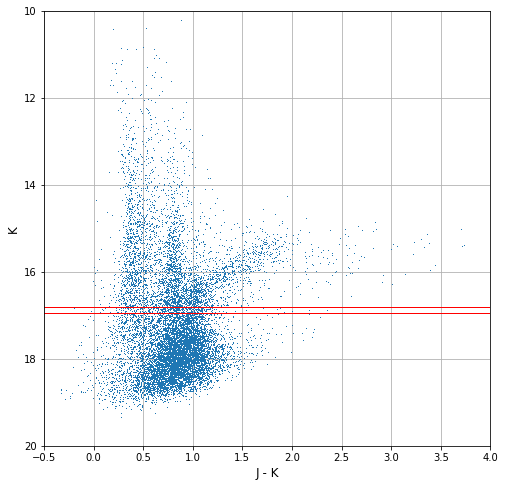

382
0.08292


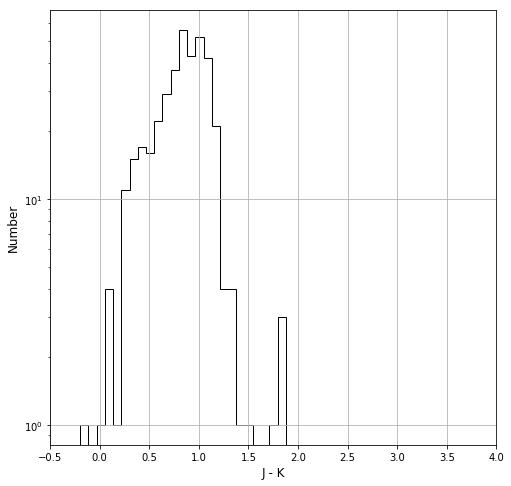

In [16]:
# 16

# Bin 1 (K_0 = 16.955 to 16.817)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.955, linewidth=1.0, color='red') # Bin 1 - lower boundary
plt.axhline(y=16.817, linewidth=1.0, color='red') # Bin 1 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 16.955) & (color_cuts.Kmag > 16.817)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

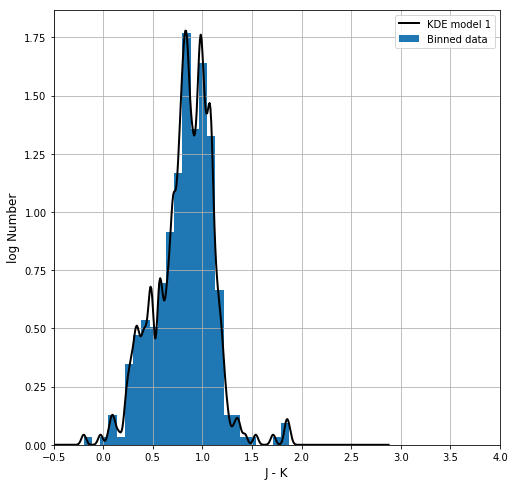

In [17]:
# 17

# Bin 1 (K_0 = 16.955 to 16.817)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 1')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.515, 0.53)
#plt.ylim(0.4, 0.55)
#plt.xlim(0.91, 0.925)
#plt.ylim(1.32, 1.36)
#plt.xlim(1.035, 1.045)
#plt.ylim(1.4, 1.45)
#plt.xlim(1.285, 1.31)
#plt.ylim(0.06, 0.10)
#plt.xlim(1.41, 1.43)
#plt.ylim(0.03, 0.06)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 16.886
### boundary 1: J-K = 0.526
### boundary 2: J-K = 0.918
### boundary 3: J-K = 1.040
### boundary 4: J-K = 1.302
### boundary 5: J-K = 1.420

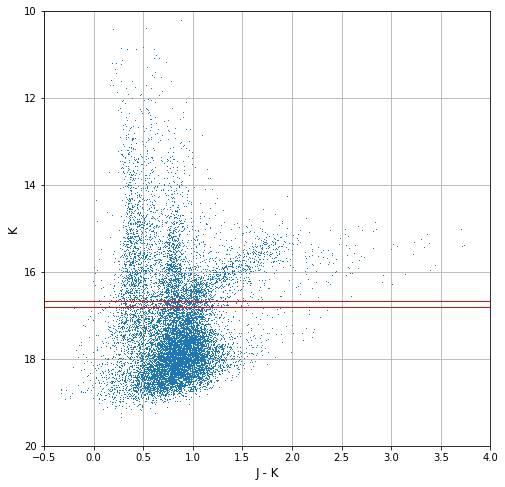

407
0.09088235294117647


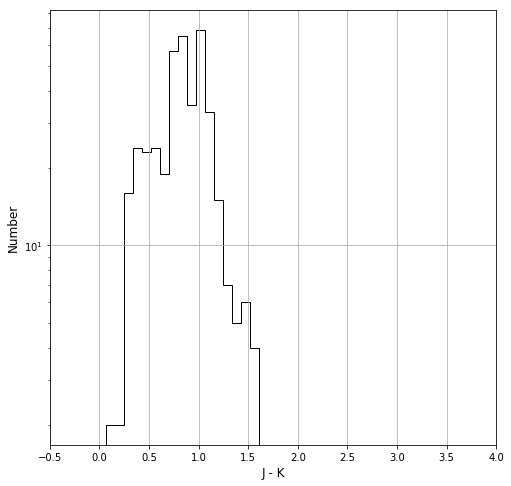

In [18]:
# 18

# Bin 2 (K_0 = 16.817 to 16.679)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.817, linewidth=1.0, color='red') # Bin 2 - lower boundary
plt.axhline(y=16.679, linewidth=1.0, color='red') # Bin 2 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 16.817) & (color_cuts.Kmag > 16.679)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

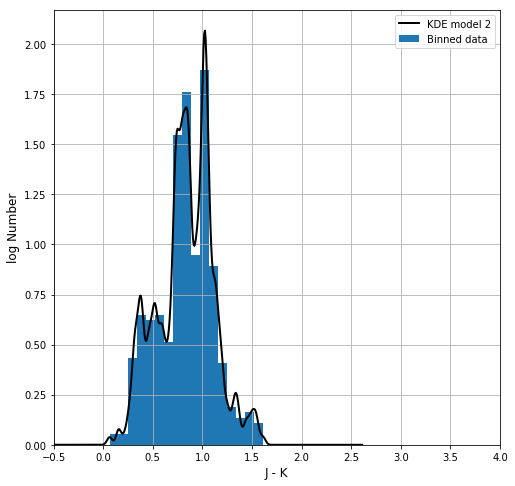

In [19]:
# 19

# Bin 2 (K_0 = 16.817 to 16.679)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 2')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.568, 0.573)
#plt.ylim(0.6, 0.63)
#plt.xlim(0.916, 0.922)
#plt.ylim(0.98, 1.00)
#plt.xlim(1.09, 1.13)
#plt.ylim(0.8, 0.9)
#plt.xlim(1.280, 1.283)
#plt.ylim(0.16, 0.18)
#plt.xlim(1.400,1.415)
#plt.ylim(0.088, 0.093)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 16.748
### boundary 1: J-K = 0.571
### boundary 2: J-K = 0.919
### boundary 3: J-K = 1.125
### boundary 4: J-K = 1.282
### boundary 5: J-K = 1.409

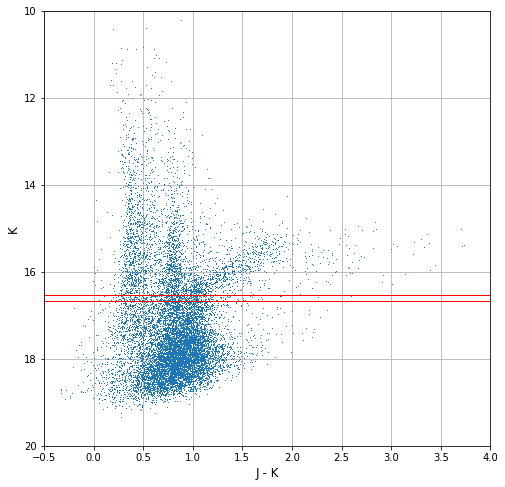

373
0.10776470588235293


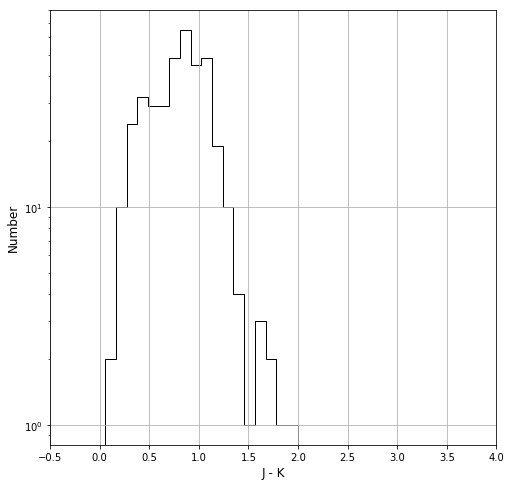

In [20]:
# 20

# Bin 3 (K_0 = 16.679 to 16.541)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.679, linewidth=1.0, color='red') # Bin 3 - lower boundary
plt.axhline(y=16.541, linewidth=1.0, color='red') # Bin 3 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 16.679) & (color_cuts.Kmag > 16.541)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

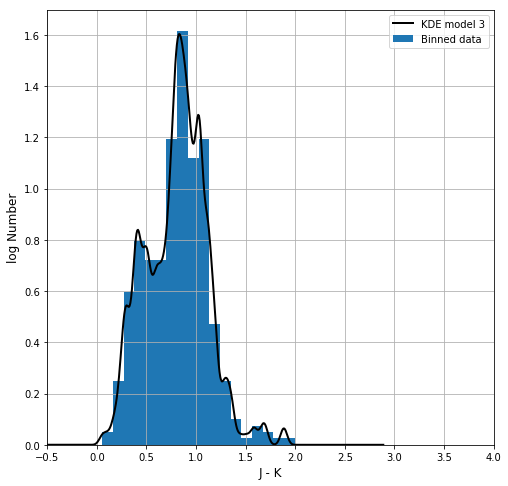

In [21]:
# 21

# Bin 3 (K_0 = 16.679 to 16.541)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 3')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.555, 0.570)
#plt.ylim(0.66, 0.67)
#plt.xlim(0.97, 0.98)
#plt.xlim(1.121, 1.123)
#plt.ylim(0.86, 0.88)
#plt.ylim(1.16, 1.19)
#plt.xlim(1.25, 1.275)
#plt.ylim(0.245, 0.25)
#plt.xlim(1.46, 1.49)
#plt.ylim(0.035, 0.045)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 16.610
### boundary 1: J-K = 0.561
### boundary 2: J-K = 0.976
### boundary 3: J-K = 1.122===
### boundary 4: J-K = 1.260
### boundary 5: J-K = 1.475

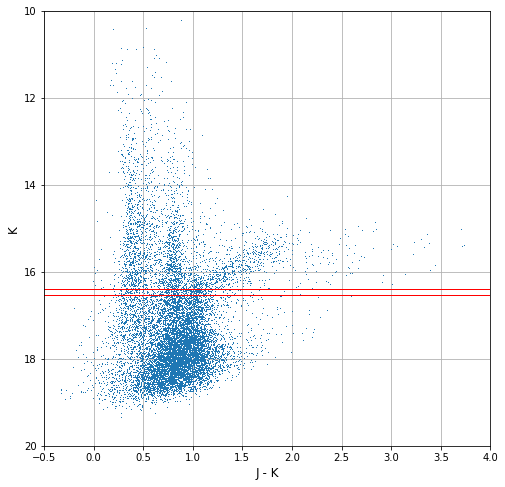

344
0.09868421052631582


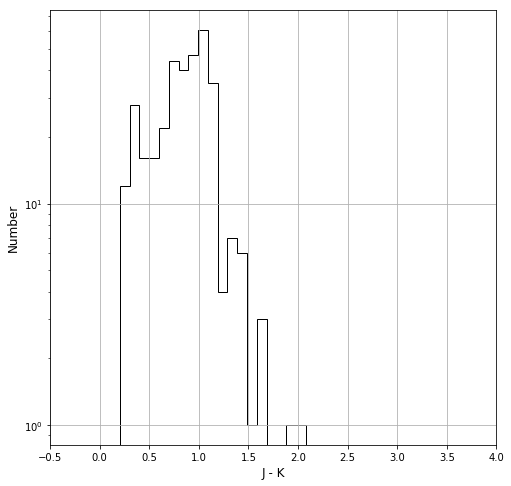

In [22]:
# 22

# Bin 4 (K_0 = 16.541 to 16.403)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.541, linewidth=1.0, color='red') # Bin 4 - lower boundary
plt.axhline(y=16.403, linewidth=1.0, color='red') # Bin 4 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 16.541) & (color_cuts.Kmag > 16.403)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

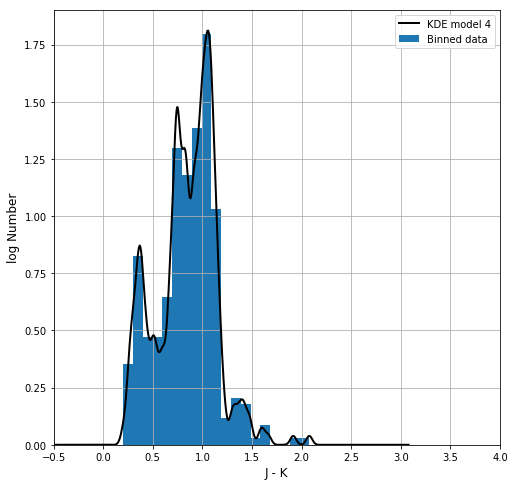

In [23]:
# 23

# Bin 4 (K_0 = 16.541 to 16.403)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 4')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.56, 0.57)
#plt.ylim(0.4, 0.41)
#plt.xlim(0.878, 0.882)
#plt.xlim(1.0, 1.3)
#plt.ylim(1.20, 1.40)
#plt.xlim(1.255, 1.27)
#plt.ylim(0.1, 0.12)
#plt.xlim(1.538, 1.545)
#plt.ylim(0.02, 0.04)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 16.472
### boundary 1: J-K = 0.562
### boundary 2: J-K = 0.880
### boundary 3: J-K = 
### boundary 4: J-K = 1.261
### boundary 5: J-K = 1.540

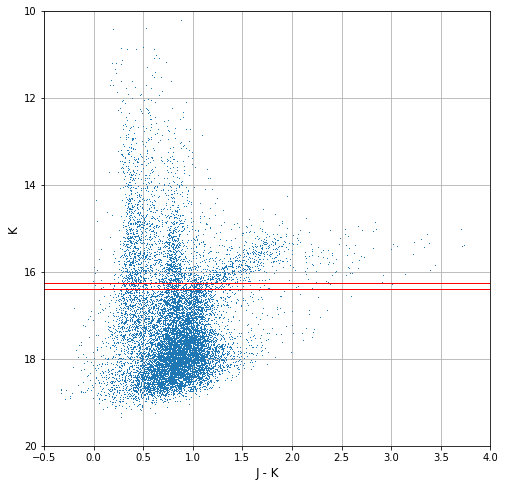

316
0.1391764705882353


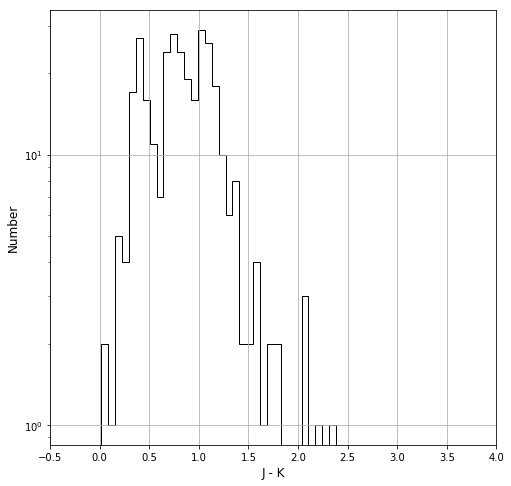

In [24]:
# 24

# Bin 5 (K_0 = 16.403 to 16.265)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.403, linewidth=1.0, color='red') # Bin 5 - lower boundary
plt.axhline(y=16.265, linewidth=1.0, color='red') # Bin 5 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 16.403) & (color_cuts.Kmag > 16.265)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/2., binwidth/2.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

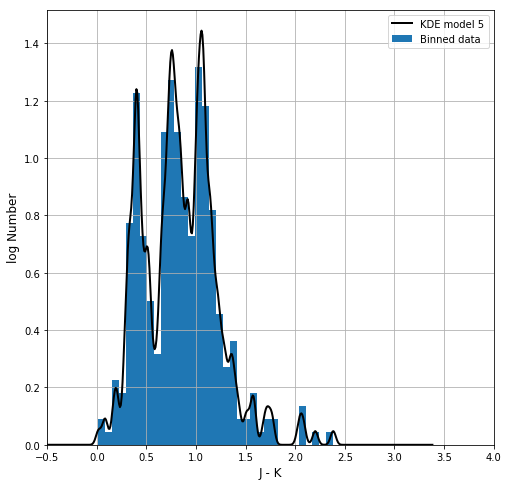

In [25]:
# 25

# Bin 5 (K_0 = 16.403 to 16.265)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2., binwidth/2.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 5')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.575, 0.59)
#plt.ylim(0.32, 0.35)
#plt.xlim(0.94, 0.97)
#plt.ylim(0.7, 0.8)
#plt.xlim(1.1, 1.135)
#plt.ylim(0.9, 1.0)
#plt.xlim(1.32, 1.33)
#plt.ylim(0.285, 0.295)
#plt.xlim(1.63, 1.65)
#plt.ylim(0.02, 0.04)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 16.334
### boundary 1: J-K = 0.583
### boundary 2: J-K = 0.959
### boundary 3: J-K = 1.137
### boundary 4: J-K = 1.327
### boundary 5: J-K = 1.642

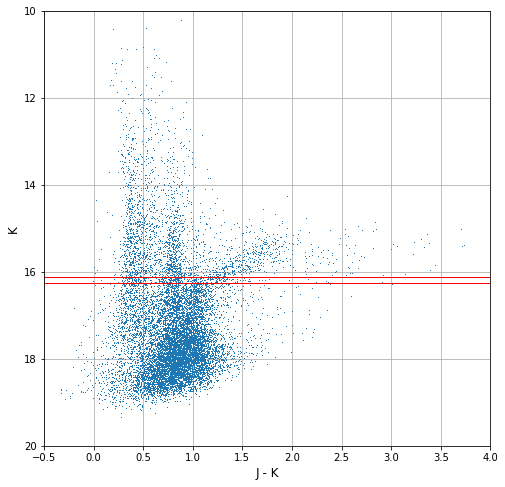

332
0.16957142857142857


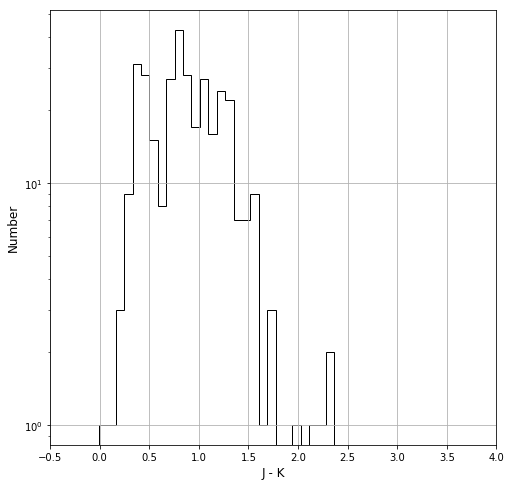

In [26]:
# 26

# Bin 6 (K_0 = 16.265 to 16.127)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.265, linewidth=1.0, color='red') # Bin 6 - lower boundary
plt.axhline(y=16.127, linewidth=1.0, color='red') # Bin 6 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 16.265) & (color_cuts.Kmag > 16.127)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/2., binwidth/2.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

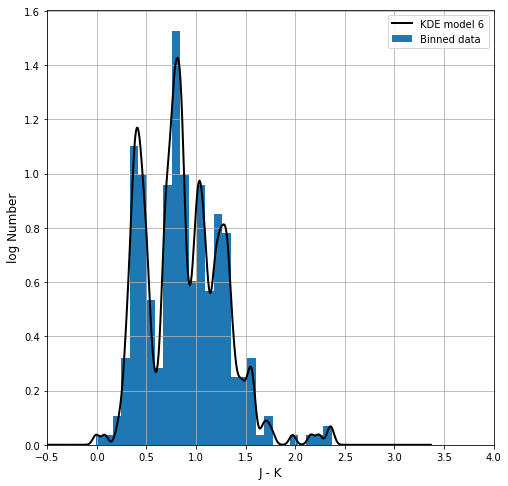

In [27]:
# 27

# Bin 6 (K_0 = 16.265 to 16.127)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2., binwidth/2.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 6')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.585, 0.605)
#plt.ylim(0.26, 0.28)
#plt.xlim(0.93, 0.945)
#plt.ylim(0.58, 0.6)
#plt.xlim(1.475, 1.495)
#plt.ylim(0.236, 0.237)
#plt.xlim(1.865, 1.875)
#plt.ylim(0.0, 0.002)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 16.196
### boundary 1: J-K = 0.597
### boundary 2: J-K = 0.939
### boundary 3: J-K = 1.140
### boundary 4: J-K = 1.483
### boundary 5: J-K = 1.868

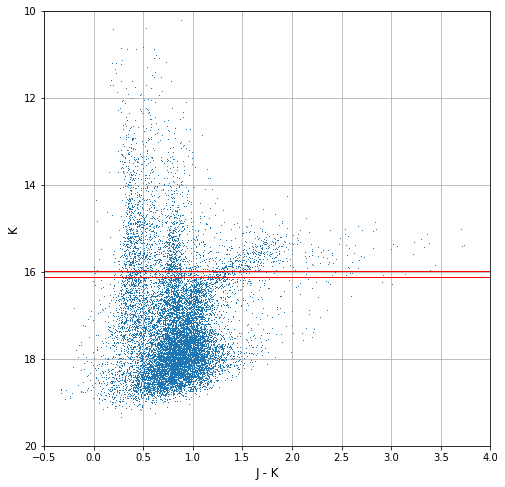

269
0.17260000000000003


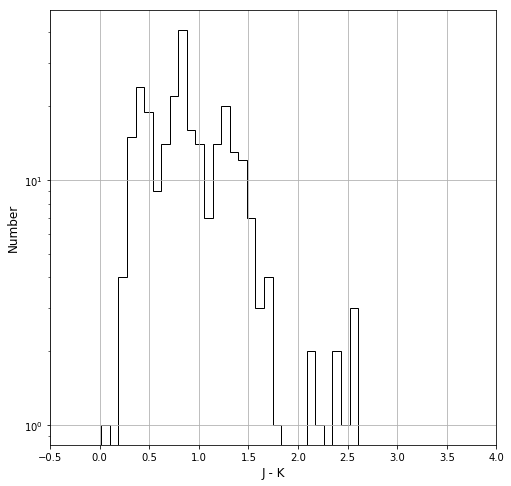

In [28]:
# 28

# Bin 7 (K_0 = 16.127 to 15.989)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=16.127, linewidth=1.0, color='red') # Bin 7 - lower boundary
plt.axhline(y=15.989, linewidth=1.0, color='red') # Bin 7 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 16.127) & (color_cuts.Kmag > 15.989)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/2., binwidth/2.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

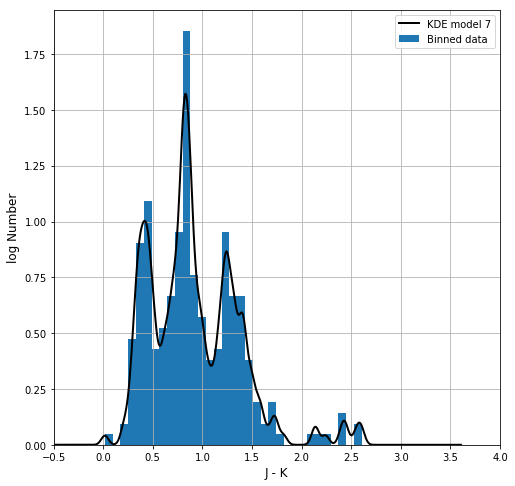

In [29]:
# 29

# Bin 7 (K_0 = 16.127 to 15.989)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2.2, binwidth/2.2)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.2)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 7')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.565, 0.58)
#plt.ylim(0.44, 0.45)
#plt.xlim(1.07, 1.11)
#plt.ylim(0.34, 0.36)
#plt.xlim(1.365, 1.375)
#plt.ylim(0.575, 0.585)
#plt.xlim(1.65, 1.66)
#plt.ylim(0.085, 0.095)
#plt.xlim(1.95, 1.99)
#plt.ylim(0.0, 0.00015)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 16.058
### boundary 1: J-K = 0.571
### boundary 2: J-K = 1.086
### boundary 3: J-K = 1.371
### boundary 4: J-K = 1.656
### boundary 5: J-K = 1.974

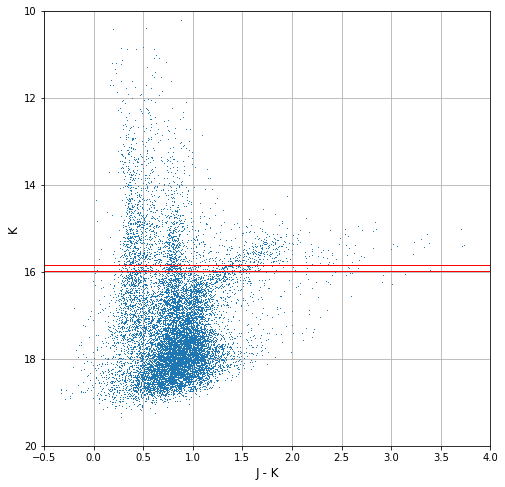

262
0.22150000000000003


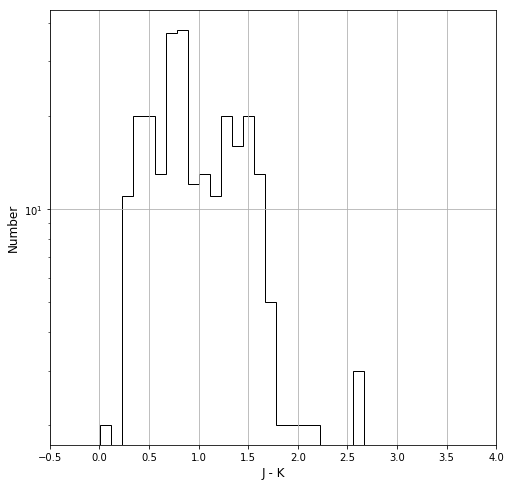

In [30]:
# 30

# Bin 8 (K_0 = 15.989 to 15.851)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.989, linewidth=1.0, color='red') # Bin 8 - lower boundary
plt.axhline(y=15.851, linewidth=1.0, color='red') # Bin 8 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 15.989) & (color_cuts.Kmag > 15.851)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/2., binwidth/2.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

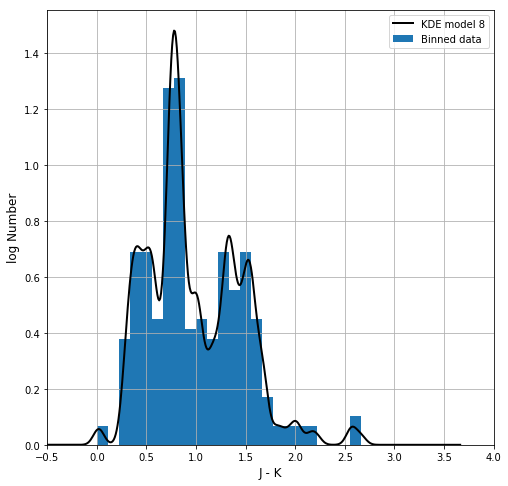

In [31]:
# 31

# Bin 8 (K_0 = 15.989 to 15.851)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2., binwidth/2.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 8')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.625, 0.635)
#plt.ylim(0.5, 0.6)
#plt.xlim(0.95, 0.985)
#plt.ylim(0.53, 0.56)
#plt.xlim(1.115, 1.125)
#plt.ylim(0.33, 0.35)
#plt.xlim(1.895, 1.90)
#plt.ylim(0.06, 0.065)
#plt.xlim(2.36, 2.4)
#plt.ylim(0.0, 0.001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 15.920
### boundary 1: J-K = 0.629
### boundary 2: J-K = 0.965
### boundary 3: J-K = 1.125
### boundary 4: J-K = 1.899
### boundary 5: J-K = 2.384

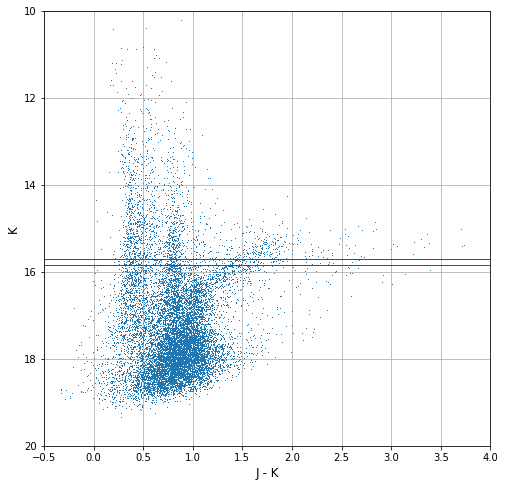

236
0.26209999999999994


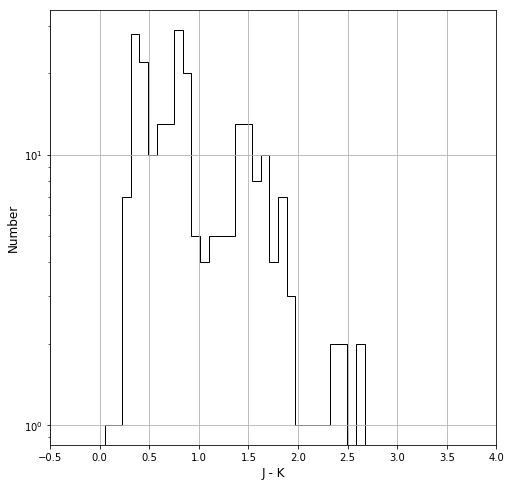

In [32]:
# 32

# Bin 9 (K_0 = 15.851 to 15.713)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.851, linewidth=1.0, color='red') # Bin 9 - lower boundary
plt.axhline(y=15.713, linewidth=1.0, color='red') # Bin 9 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 15.851) & (color_cuts.Kmag > 15.713)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/3., binwidth/3.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

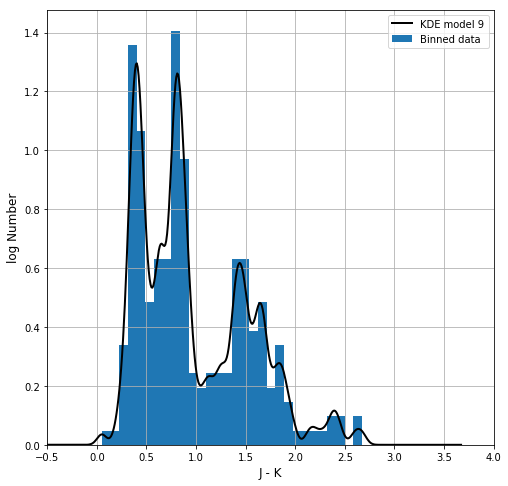

In [33]:
# 33

# Bin 9 (K_0 = 15.851 to 15.713)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3., binwidth/3.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 9')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.557, 0.563)
#plt.ylim(0.525, 0.54)
#plt.xlim(1.045, 1.055)
#plt.ylim(0.2, 0.205)
#plt.xlim(1.275, 1.29)
#plt.ylim(0.275, 0.29)
#plt.xlim(2.057, 2.065)
#plt.ylim(0.01, 0.03)
#plt.xlim(2.52, 2.54)
#plt.ylim(0.02, 0.03)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 15.782
### boundary 1: J-K = 0.560
### boundary 2: J-K = 1.051
### boundary 3: J-K = 1.283
### boundary 4: J-K = 2.061
### boundary 5: J-K = 2.533

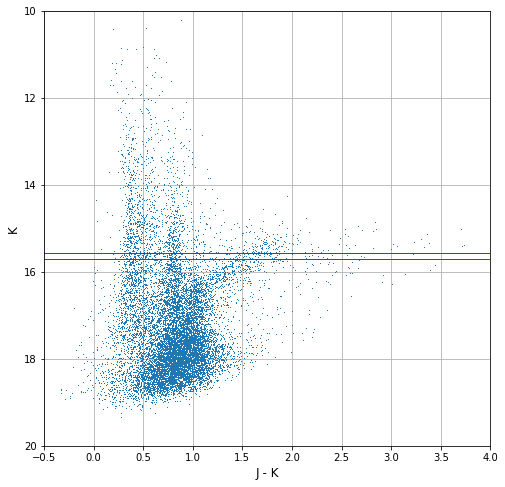

234
0.3165000000000001


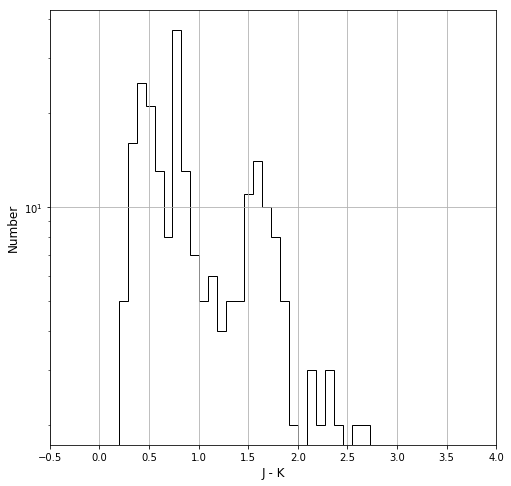

In [34]:
# 34

# Bin 10 (K_0 = 15.713 to 15.575)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.713, linewidth=1.0, color='red') # Bin 10 - lower boundary
plt.axhline(y=15.575, linewidth=1.0, color='red') # Bin 10 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 15.713) & (color_cuts.Kmag > 15.575)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/3.5, binwidth/3.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

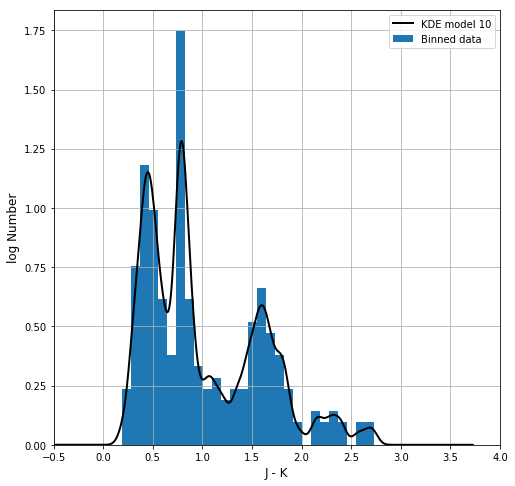

In [35]:
# 35

# Bin 10 (K_0 = 15.713 to 15.575)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 10')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.64, 0.65)
#plt.ylim(0.55, 0.57)
#plt.xlim(0.98, 1.02)
#plt.ylim(0.27, 0.28)
#plt.xlim(1.225,1.3)
#plt.ylim(0.17, 0.19)
#plt.xlim(2.04, 2.05)
#plt.ylim(0.043, 0.046)
#plt.xlim(2.49, 2.51)
#plt.ylim(0.035, 0.037)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 15.644
### boundary 1: J-K = 0.649
### boundary 2: J-K = 1.010
### boundary 3: J-K = 1.265
### boundary 4: J-K = 2.046
### boundary 5: J-K = 2.500

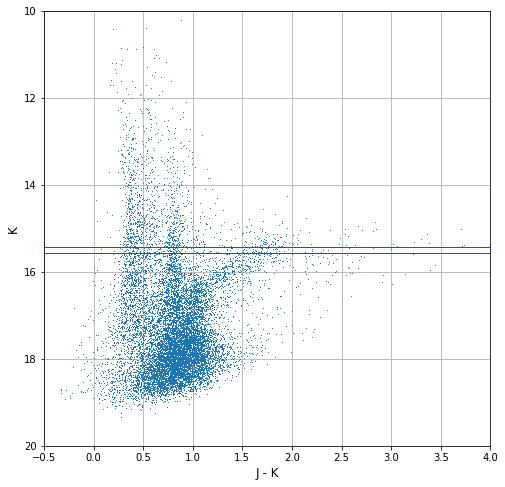

179
0.3248888888888889


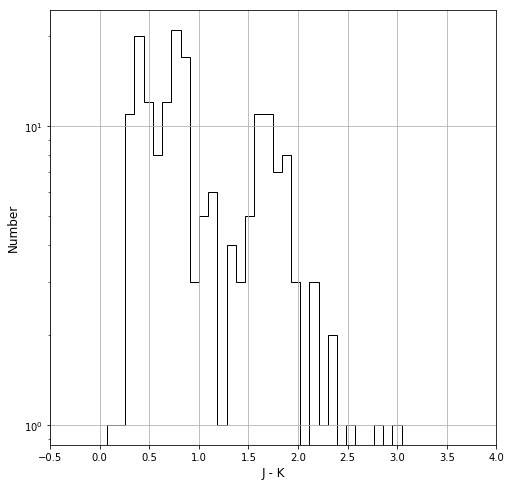

In [36]:
# 36

# Bin 11 (K_0 = 15.575 to 15.437)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.575, linewidth=1.0, color='red') # Bin 11 - lower boundary
plt.axhline(y=15.437, linewidth=1.0, color='red') # Bin 11 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 15.575) & (color_cuts.Kmag > 15.437)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/3.5, binwidth/3.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

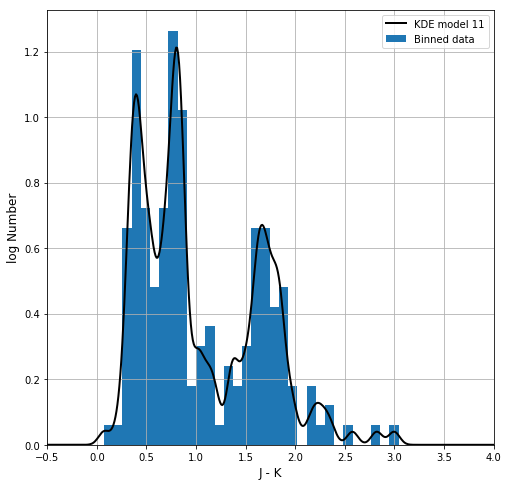

In [37]:
# 37

# Bin 11 (K_0 = 15.575 to 15.437)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 11')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.60, 0.615)
#plt.ylim(0.57, 0.572)
#plt.xlim(1.015, 1.02)
#plt.ylim(0.293, 0.296)
#plt.xlim(2.07, 2.085)
#plt.ylim(0.057, 0.058)
#plt.xlim(2.474, 2.479)
#plt.ylim(0.013, 0.015)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 15.506
### boundary 1: J-K = 0.602
### boundary 2: J-K = 1.017
### boundary 3: J-K = 1.441
### boundary 4: J-K = 2.078
### boundary 5: J-K = 2.477

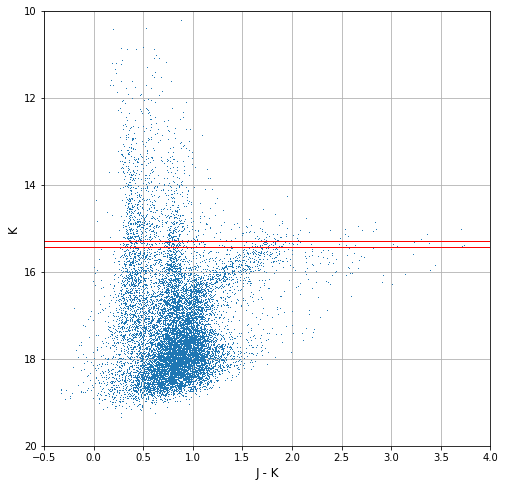

177
0.31179999999999997


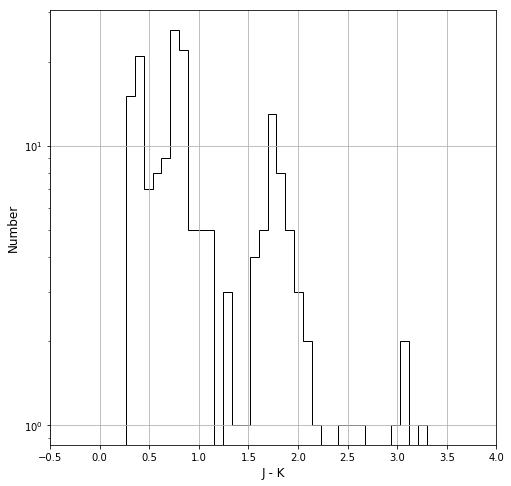

In [38]:
# 38

# Bin 12 (K_0 = 15.437 to 15.299)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.437, linewidth=1.0, color='red') # Bin 12 - lower boundary
plt.axhline(y=15.299, linewidth=1.0, color='red') # Bin 12 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 15.437) & (color_cuts.Kmag > 15.299)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/3.5, binwidth/3.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

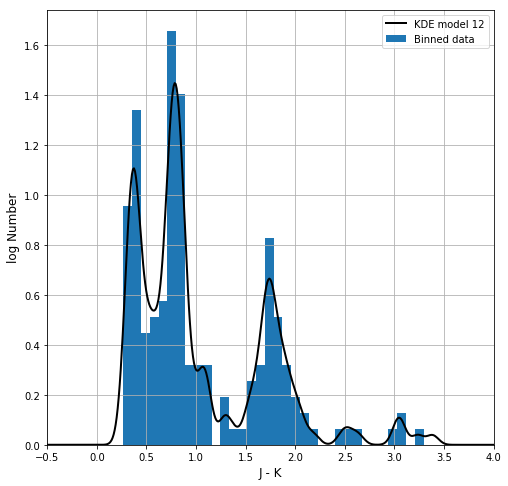

In [39]:
# 39

# Bin 12 (K_0 = 15.437 to 15.299)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 12')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.565, 0.575)
#plt.ylim(0.535, 0.540)
#plt.xlim(1.008, 1.013)
#plt.ylim(0.295, 0.298)
#plt.xlim(1.415, 1.425)
#plt.ylim(0.07, 0.075)
#plt.xlim(2.33, 2.34)
#plt.ylim(0.004, 0.005)
#plt.xlim(2.82, 2.83)
#plt.ylim(0.0004, 0.0006)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 15.368
### boundary 1: J-K = 0.570
### boundary 2: J-K = 1.011
### boundary 3: J-K = 1.421
### boundary 4: J-K = 2.334
### boundary 5: J-K = 2.826

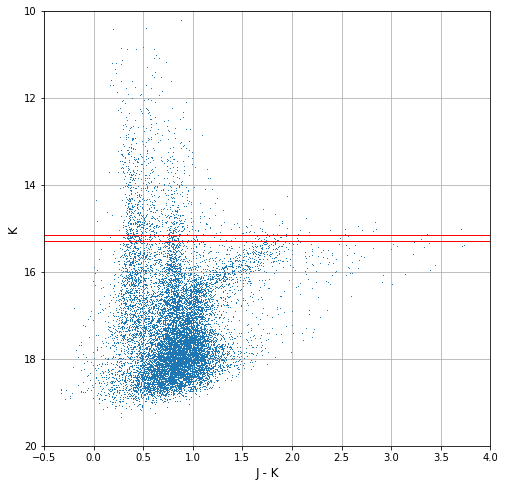

144
0.18770588235294122


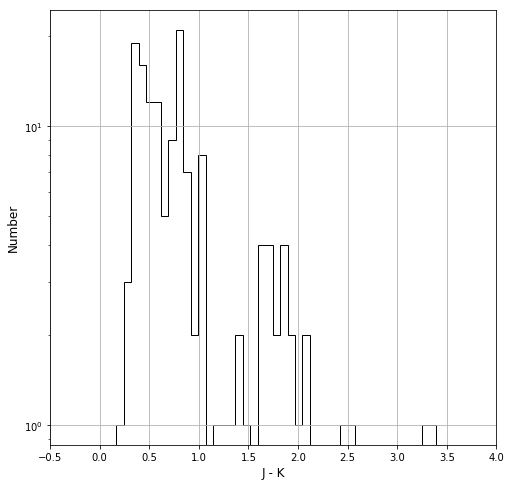

In [40]:
# 40

# Bin 13 (K_0 = 15.299 to 15.161)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.299, linewidth=1.0, color='red') # Bin 13 - lower boundary
plt.axhline(y=15.161, linewidth=1.0, color='red') # Bin 13 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 15.299) & (color_cuts.Kmag > 15.161)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/2.5, binwidth/2.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

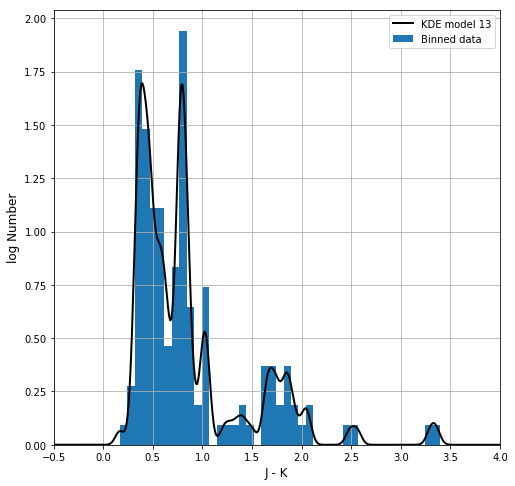

In [41]:
# 41

# Bin 13 (K_0 = 15.299 to 15.161)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2.5, binwidth/2.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 13')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.674, 0.678)
#plt.ylim(0.58, 0.60)
#plt.xlim(0.945, 0.95)
#plt.ylim(0.28, 0.29)
#plt.xlim(1.545, 1.555)
#plt.ylim(0.058, 0.06)
#plt.xlim(2.275, 2.280)
#plt.ylim(0.0, 0.000002)
#plt.xlim(2.92, 2.94)
#plt.ylim(0.0, 0.000000000000001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 15.230
### boundary 1: J-K = 0.675
### boundary 2: J-K = 0.946
### boundary 3: J-K = 1.549
### boundary 4: J-K = 2.277
### boundary 5: J-K = 2.933

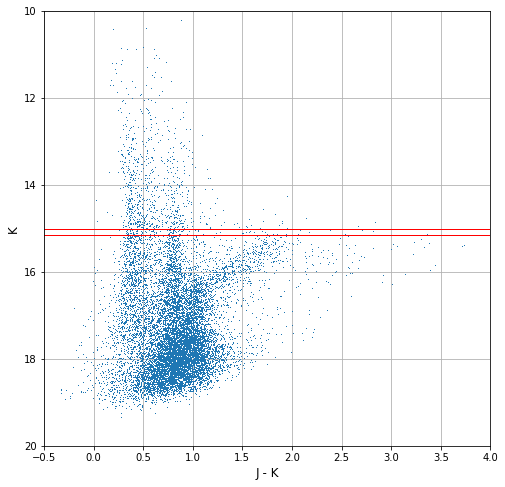

122
0.246


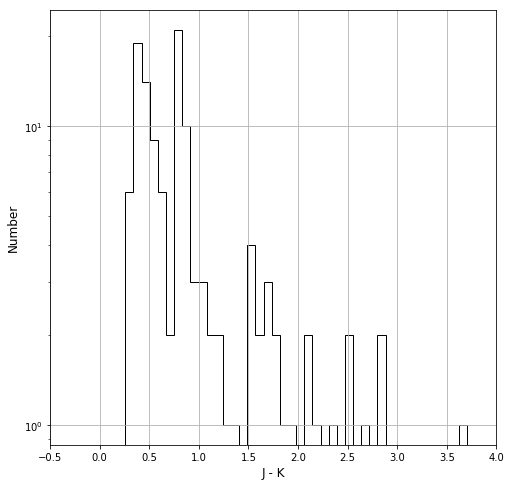

In [42]:
# 42

# Bin 14 (K_0 = 15.161 to 15.023)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.161, linewidth=1.0, color='red') # Bin 14 - lower boundary
plt.axhline(y=15.023, linewidth=1.0, color='red') # Bin 14 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 15.161) & (color_cuts.Kmag > 15.023)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/3.0, binwidth/3.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

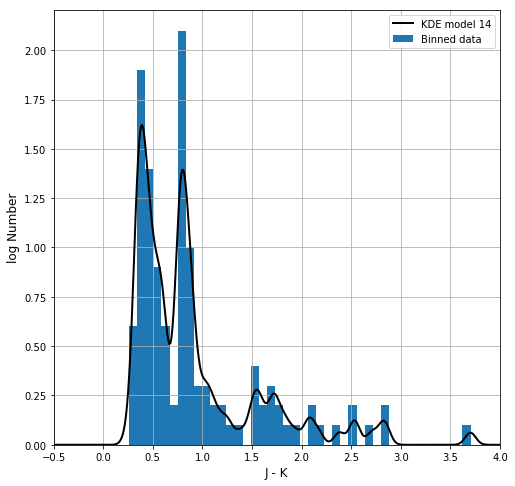

In [43]:
# 43

# Bin 14 (K_0 = 15.161 to 15.023)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.0, binwidth/3.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 14')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.665, 0.668)
#plt.ylim(0.48, 0.54)
#plt.xlim(0.99, 1.0)
#plt.ylim(0.35, 0.37)
#plt.xlim(1.35, 1.36)
#plt.ylim(0.077, 0.082)
#plt.xlim(2.26, 2.28)
#plt.ylim(0.015, 0.02)
#plt.xlim(3.27, 3.28)
#plt.ylim(0.0, 0.00000000000001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 15.092
### boundary 1: J-K = 0.667
### boundary 2: J-K = 0.994
### boundary 3: J-K = 1.354
### boundary 4: J-K = 2.270
### boundary 5: J-K = 3.274

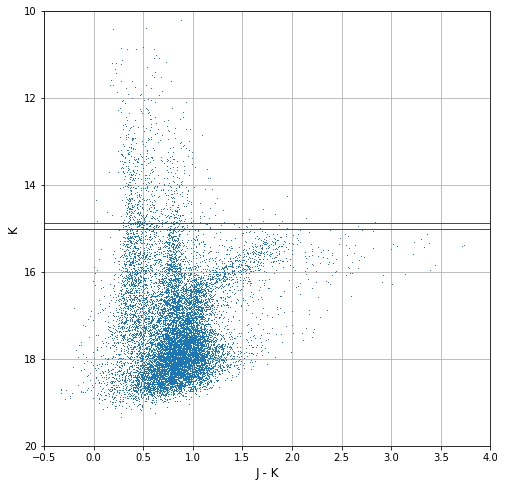

106
0.16928571428571426


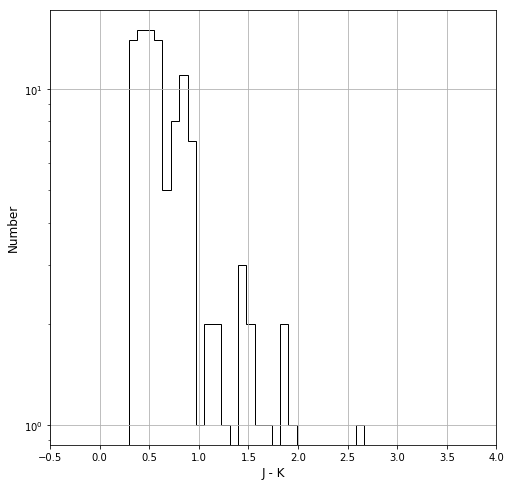

In [44]:
# 44

# Bin 15 (K_0 = 15.023 to 14.885)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=15.023, linewidth=1.0, color='red') # Bin 15 - lower boundary
plt.axhline(y=14.885, linewidth=1.0, color='red') # Bin 15 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 15.023) & (color_cuts.Kmag > 14.885)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/2.0, binwidth/2.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

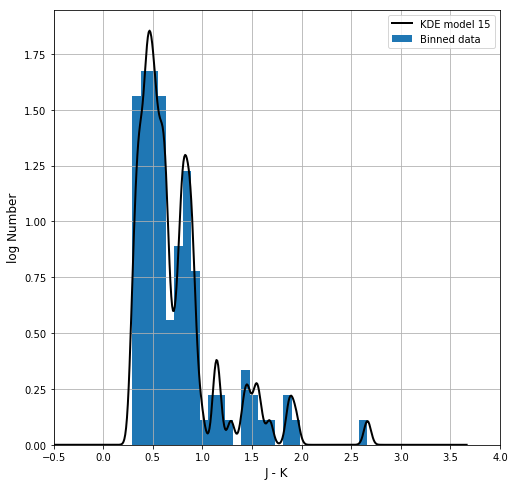

In [45]:
# 45

# Bin 15 (K_0 = 15.023 to 14.885)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2.0, binwidth/2.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 15')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.70, 0.72)
#plt.ylim(0.59, 0.61)
#plt.xlim(1.05, 1.06)
#plt.ylim(0.04, 0.06)
#plt.xlim(1.34, 1.345)
#plt.ylim(0.04, 0.06)
#plt.xlim(2.3, 2.31)
#plt.ylim(0.0, 0.000000000000000000001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 14.954
### boundary 1: J-K = 0.713
### boundary 2: J-K = 1.054
### boundary 3: J-K = 1.343
### boundary 4: J-K = 2.306
### boundary 5: J-K = ---

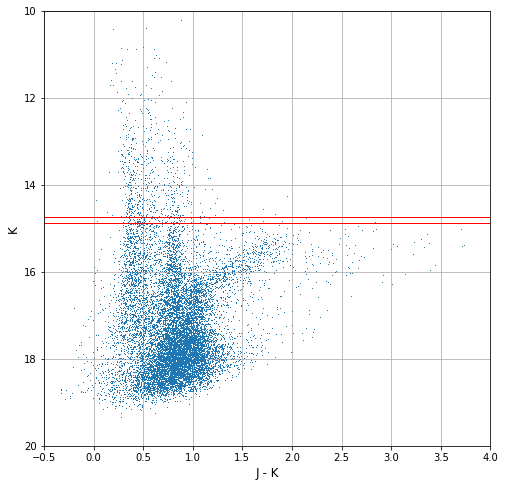

83
0.1648235294117647


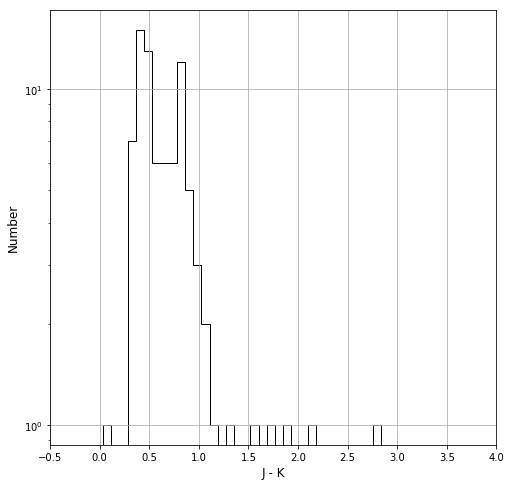

In [46]:
# 46

# Bin 16 (K_0 = 14.885 to 14.747)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.885, linewidth=1.0, color='red') # Bin 16 - lower boundary
plt.axhline(y=14.747, linewidth=1.0, color='red') # Bin 16 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 14.885) & (color_cuts.Kmag > 14.747)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/2.0, binwidth/2.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

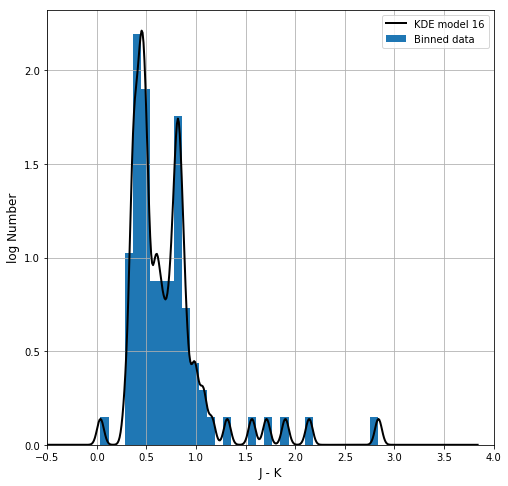

In [47]:
# 47

# Bin 16 (K_0 = 14.885 to 14.747)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2.0, binwidth/2.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 16')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.69, 0.695)
#plt.ylim(0.77, 0.78)
#plt.xlim(0.95, 0.953)
#plt.ylim(0.428, 0.435)
#plt.xlim(1.44, 1.45)
#plt.ylim(0.0, 0.001)
#plt.xlim(2.47, 2.5)
#plt.ylim(0.0, 0.000000000000000000001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 14.816
### boundary 1: J-K = 0.692
### boundary 2: J-K = 0.952
### boundary 3: J-K = 1.443
### boundary 4: J-K = 2.492

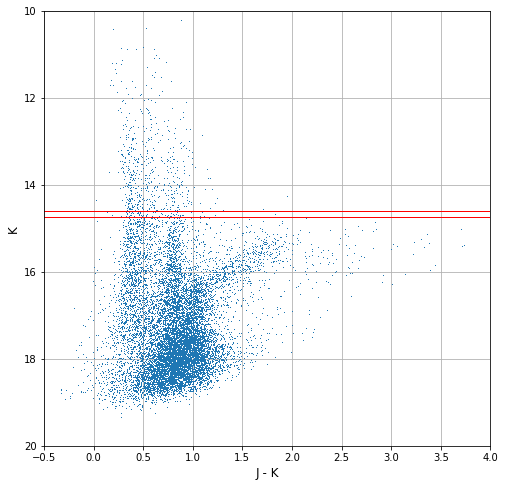

65
0.18833333333333335


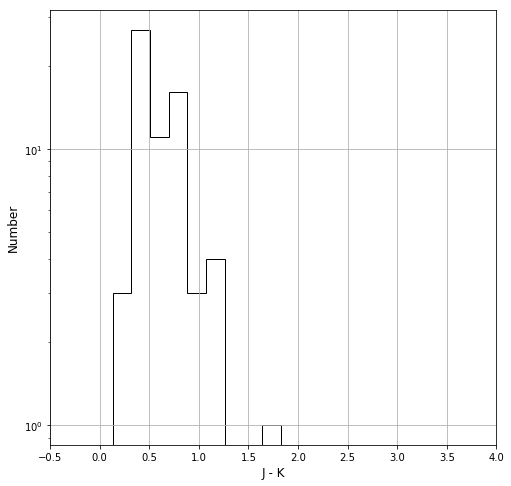

In [48]:
# 48

# Bin 17 (K_0 = 14.747 to 14.609)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.747, linewidth=1.0, color='red') # Bin 17 - lower boundary
plt.axhline(y=14.609, linewidth=1.0, color='red') # Bin 17 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 14.747) & (color_cuts.Kmag > 14.609)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

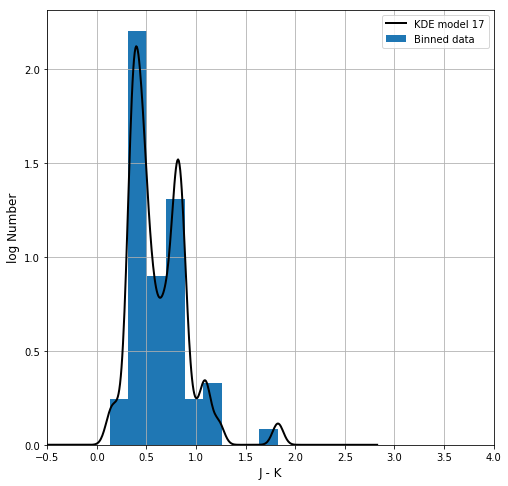

In [49]:
# 49

# Bin 17 (K_0 = 14.747 to 14.609)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 17')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.63, 0.645)
#plt.ylim(0.78, 0.79)
#plt.xlim(1.004, 1.00475)
#plt.ylim(0.247, 0.248)
#plt.xlim(1.525, 1.535)
#plt.ylim(0.0, 0.0000001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 14.678
### boundary 1: J-K = 0.642
### boundary 2: J-K = 1.004
### boundary 3: J-K = 1.530
### boundary 4: J-K = 2.500

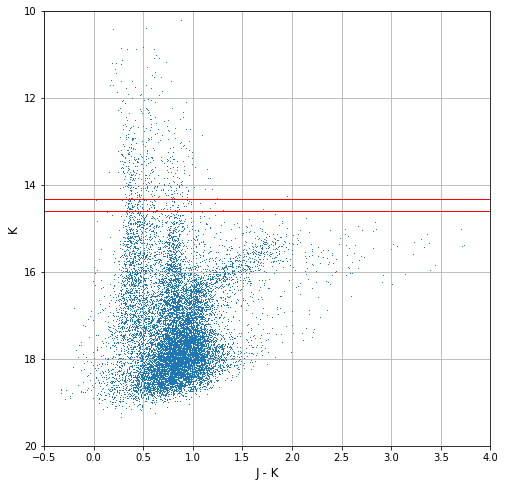

116
0.1529090909090909


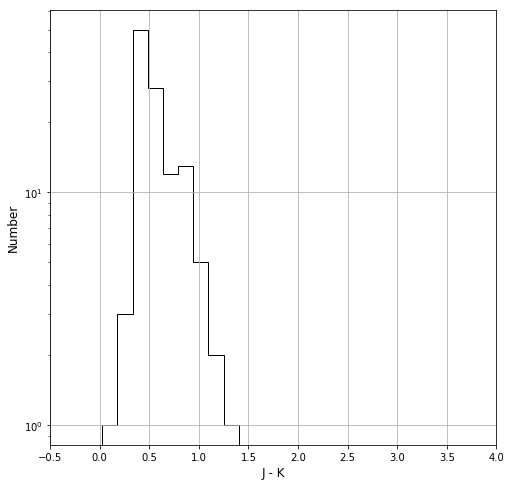

In [50]:
# 50

# Bin 18 (K_0 = 14.609 to 14.333) <- double-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.609, linewidth=1.0, color='red') # Bin 18 - lower boundary
plt.axhline(y=14.333, linewidth=1.0, color='red') # Bin 18 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 14.609) & (color_cuts.Kmag > 14.333)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

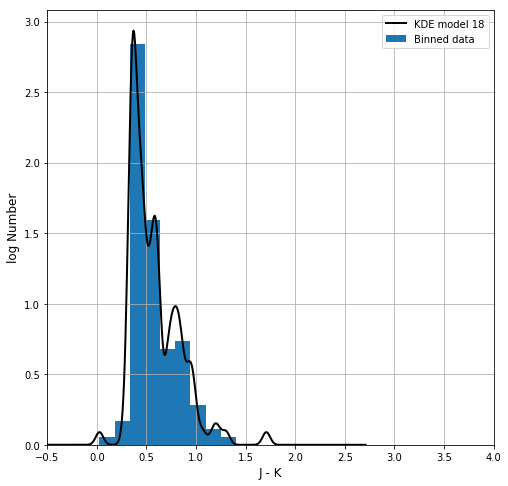

In [51]:
# 51

# Bin 18 (K_0 = 14.609 to 14.333) <- double-wide bin
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 18')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.51, 0.53)
#plt.ylim(1.4, 1.42)
#plt.xlim(1.1, 1.13)
#plt.ylim(0.07, 0.075)
#plt.xlim(1.50, 1.51)
#plt.ylim(0.0, 0.000001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 14.471
### boundary 1: J-K = 0.525
### boundary 2: J-K = 1.115
### boundary 3: J-K = 1.506
### boundary 4: J-K = 2.500

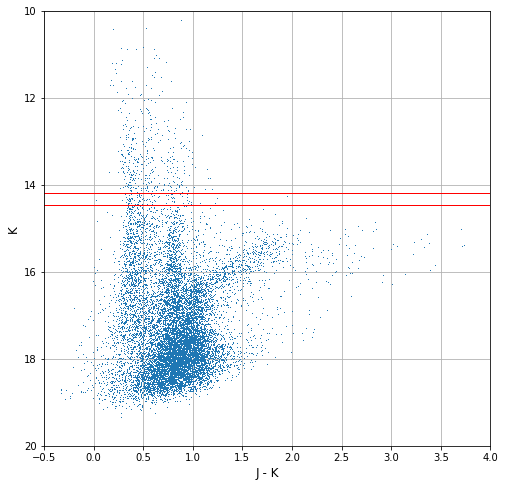

99
0.14815384615384616


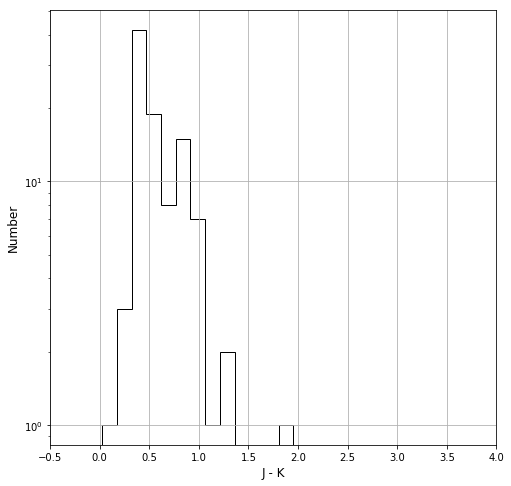

In [52]:
# 52

# Bin 19 (K_0 = 14.471 to 14.195) <- double-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.471, linewidth=1.0, color='red') # Bin 19 - lower boundary
plt.axhline(y=14.195, linewidth=1.0, color='red') # Bin 19 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 14.471) & (color_cuts.Kmag > 14.195)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

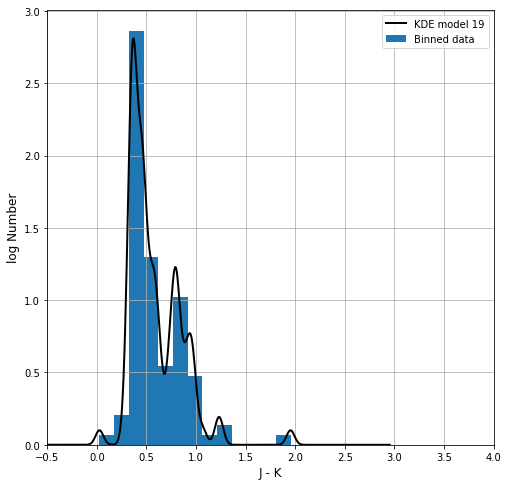

In [53]:
# 53

# Bin 19 (K_0 = 14.471 to 14.195) <- double-wide bin
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 19')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.675, 0.6805)
#plt.ylim(0.485, 0.495)
#plt.xlim(1.038, 1.045)
#plt.ylim(0.18, 0.2)
#plt.xlim(1.55, 1.65)
#plt.ylim(0.0, 0.0000000000000001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 14.333
### boundary 1: J-K = 0.679
### boundary 2: J-K = 1.041
### boundary 3: J-K = 1.600
### boundary 4: J-K = 2.500

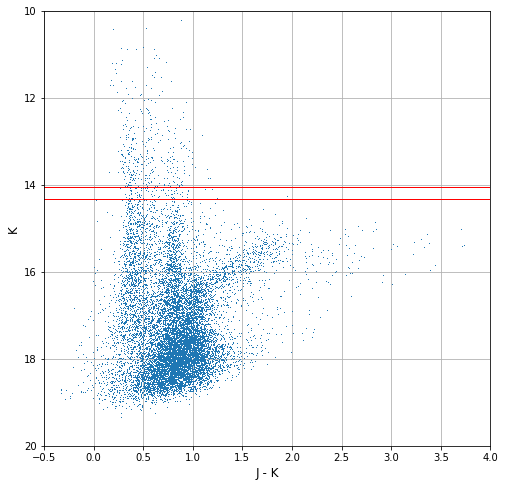

87
0.3366


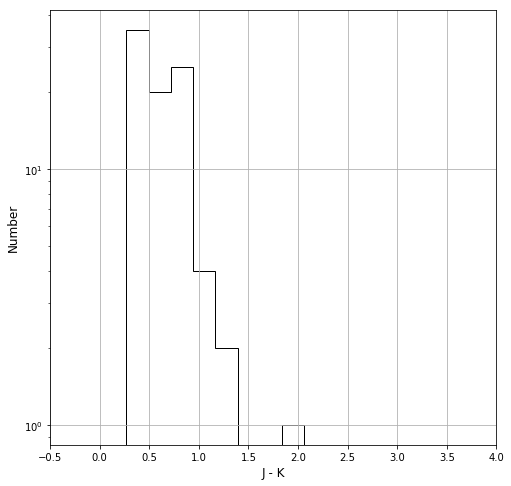

In [54]:
# 54

# Bin 20 (K_0 = 14.333 to 14.057) <- double-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.333, linewidth=1.0, color='red') # Bin 20 - lower boundary
plt.axhline(y=14.057, linewidth=1.0, color='red') # Bin 20 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 14.333) & (color_cuts.Kmag > 14.057)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.5, binwidth/1.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

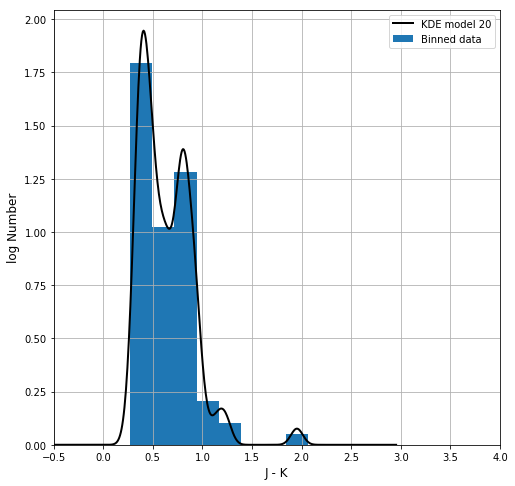

In [55]:
# 55

# Bin 20 (K_0 = 14.333 to 14.057) <- double-wide bin
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.5, binwidth/1.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 20')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.66, 0.67)
#plt.ylim(1.01, 1.02)
#plt.xlim(1.095, 1.105)
#plt.ylim(0.135, 0.14)
#plt.xlim(1.59, 1.61)
#plt.ylim(0.0, 0.00000001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 14.195
### boundary 1: J-K = 0.665
### boundary 2: J-K = 1.100
### boundary 3: J-K = 1.595
### boundary 4: J-K = 2.500

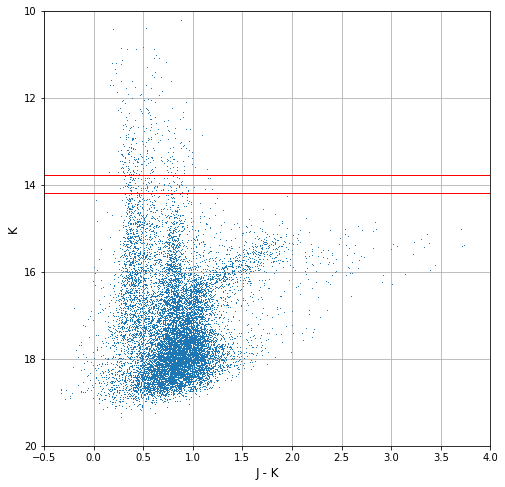

114
0.15400000000000003


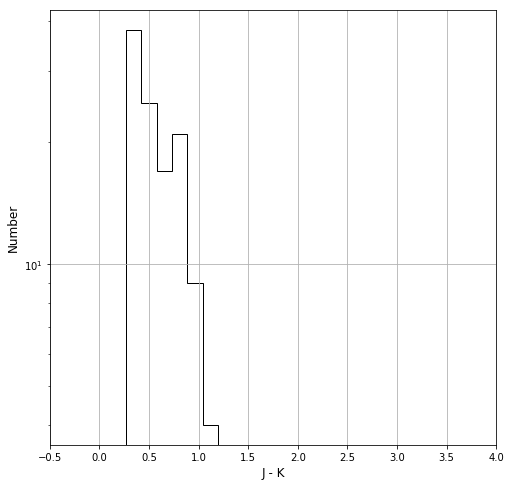

In [56]:
# 56

# Bin 21 (K_0 = 14.195 to 13.781) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.195, linewidth=1.0, color='red') # Bin 21 - lower boundary
plt.axhline(y=13.781, linewidth=1.0, color='red') # Bin 21 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 14.195) & (color_cuts.Kmag > 13.781)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

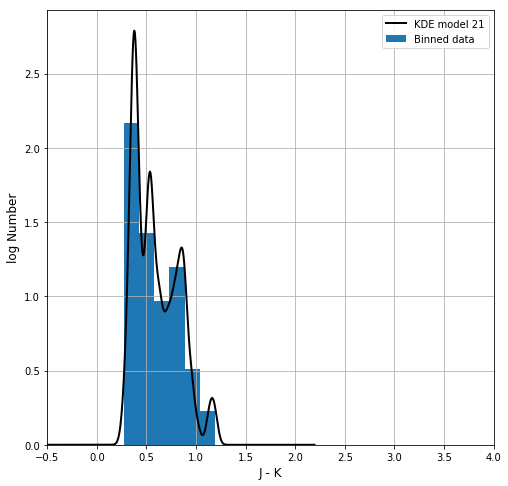

In [57]:
# 57

# Bin 21 (K_0 = 14.195 to 13.781) <- triple-wide bin
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 21')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.68, 0.692)
#plt.ylim(0.88, 0.91)
#plt.xlim(1.06, 1.072)
#plt.ylim(0.06, 0.07)
#plt.xlim(1.48,1.53)
#plt.ylim(0.0, 0.001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 13.988
### boundary 1: J-K = 0.688
### boundary 2: J-K = 1.069
### boundary 3: J-K = 2.000
### boundary 4: J-K = 2.500

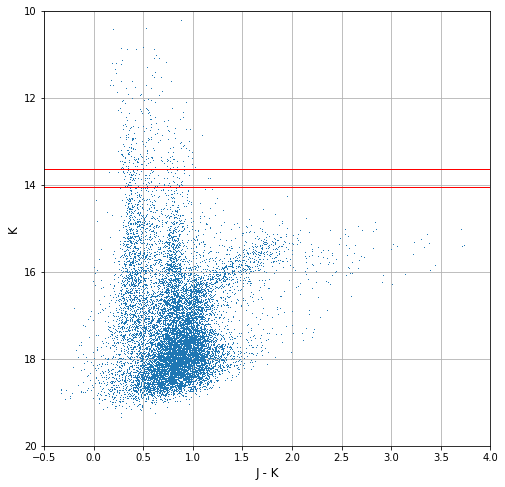

101
0.12762500000000002


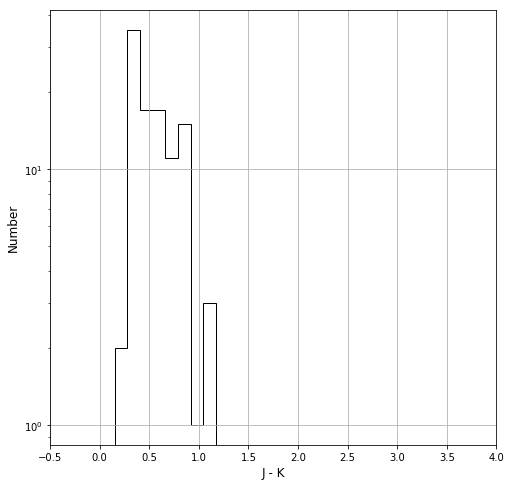

In [58]:
# 58

# Bin 22 (K_0 = 14.057 to 13.643) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=14.057, linewidth=1.0, color='red') # Bin 22 - lower boundary
plt.axhline(y=13.643, linewidth=1.0, color='red') # Bin 22 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 14.057) & (color_cuts.Kmag > 13.643)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

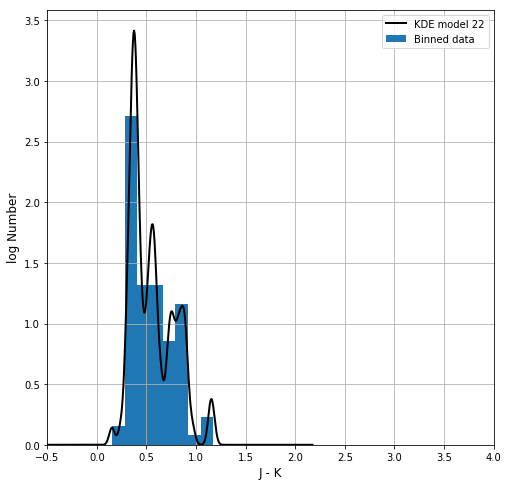

In [59]:
# 59

# Bin 22 (K_0 = 14.057 to 13.643) <- triple-wide bin
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 22')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.67, 0.674)
#plt.ylim(0.53, 0.535)
#plt.xlim(1.04, 1.06)
#plt.ylim(0.0, 0.005)
#plt.xlim(1.48,1.53)
#plt.ylim(0.0, 0.001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 13.850
### boundary 1: J-K = 0.673
### boundary 2: J-K = 1.048
### boundary 3: J-K = 
### boundary 4: J-K = 

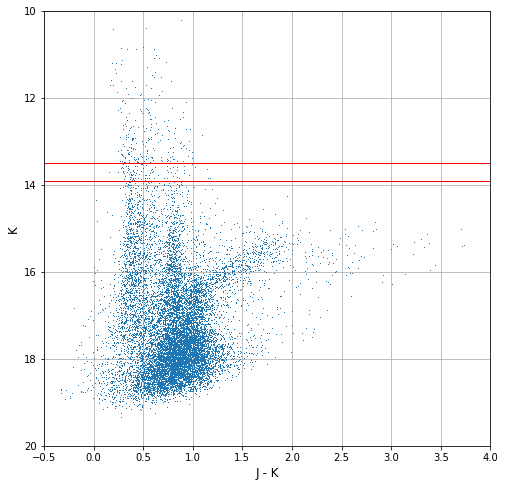

92
0.12762500000000002


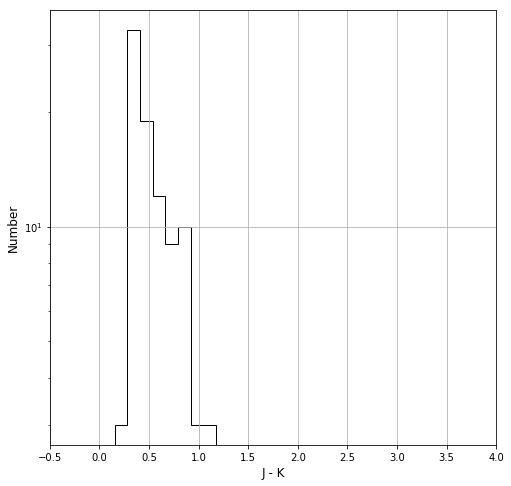

In [60]:
# 60

# Bin 23 (K_0 = 13.919 to 13.505) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=13.919, linewidth=1.0, color='red') # Bin 23 - lower boundary
plt.axhline(y=13.505, linewidth=1.0, color='red') # Bin 23 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 13.919) & (color_cuts.Kmag > 13.505)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

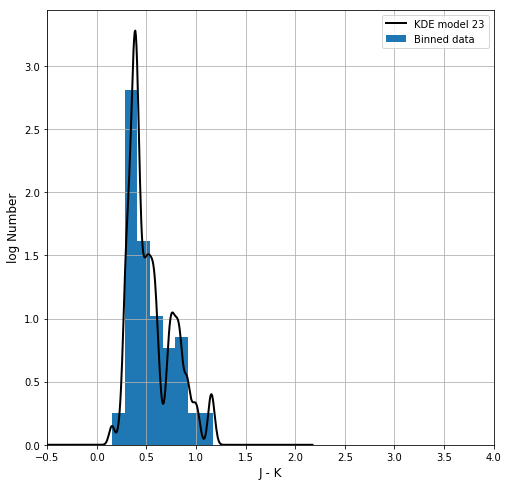

In [61]:
# 61

# Bin 23 (K_0 = 13.919 to 13.505) <- triple-wide bin
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 23')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.66, 0.67)
#plt.ylim(0.3, 0.35)
#plt.xlim(1.07, 1.085)
#plt.ylim(0.04, 0.06)
#plt.xlim(1.48,1.53)
#plt.ylim(0.0, 0.001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 13.712
### boundary 1: J-K = 0.666
### boundary 2: J-K = 1.078
### boundary 3: J-K = 2.000
### boundary 4: J-K = 2.500

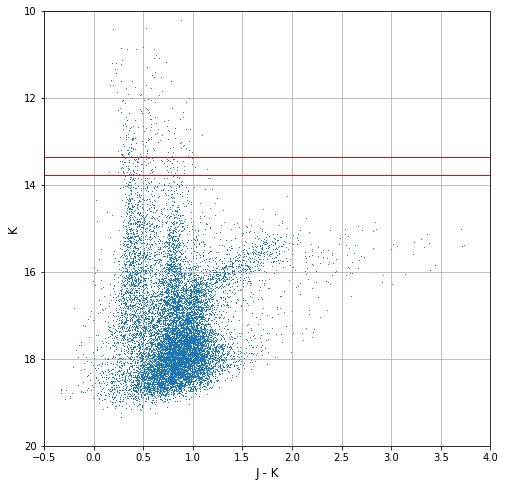

99
0.14128571428571426


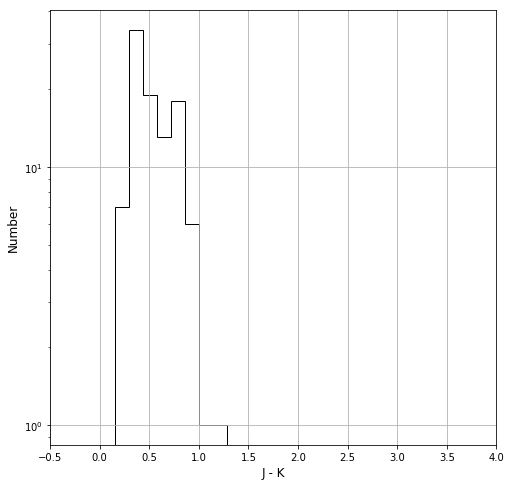

In [62]:
# 62

# Bin 24 (K_0 = 13.781 to 13.367) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=13.781, linewidth=1.0, color='red') # Bin 24 - lower boundary
plt.axhline(y=13.367, linewidth=1.0, color='red') # Bin 24 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 13.781) & (color_cuts.Kmag > 13.367)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

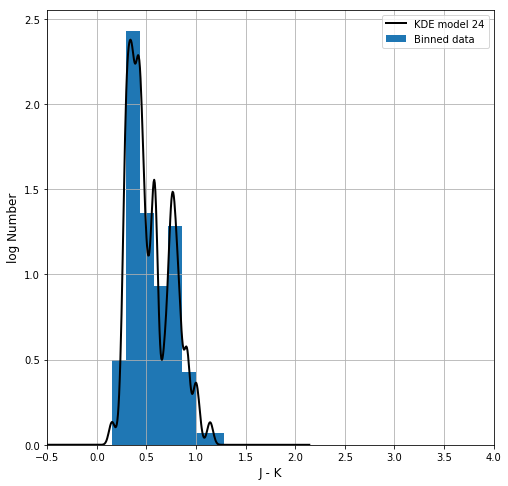

In [63]:
# 63

# Bin 24 (K_0 = 13.781 to 13.367) <- triple-wide bin
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 24')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.655, 0.659)
#plt.ylim(0.475, 0.525)
#plt.xlim(1.08, 1.09)
#plt.ylim(0.04, 0.045)
#plt.xlim(1.48,1.53)
#plt.ylim(0.0, 0.001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 13.574
### boundary 1: J-K = 0.656
### boundary 2: J-K = 1.082
### boundary 3: J-K = 2.000
### boundary 4: J-K = 2.500

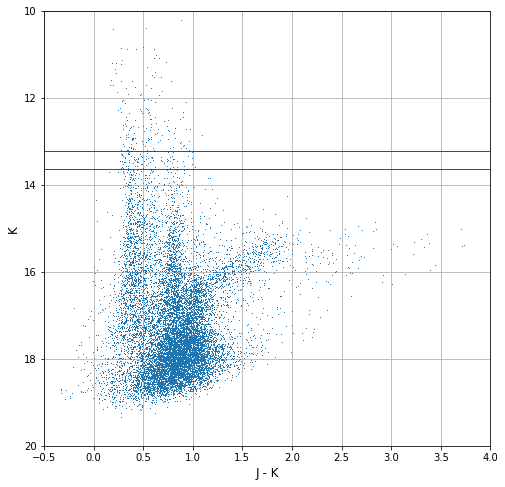

87
0.1542


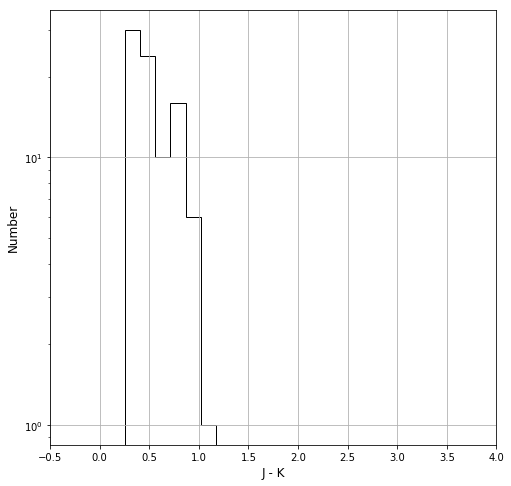

In [64]:
# 64

# Bin 25 (K_0 = 13.643 to 13.229) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=13.643, linewidth=1.0, color='red') # Bin 25 - lower boundary
plt.axhline(y=13.229, linewidth=1.0, color='red') # Bin 25 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 13.643) & (color_cuts.Kmag > 13.229)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

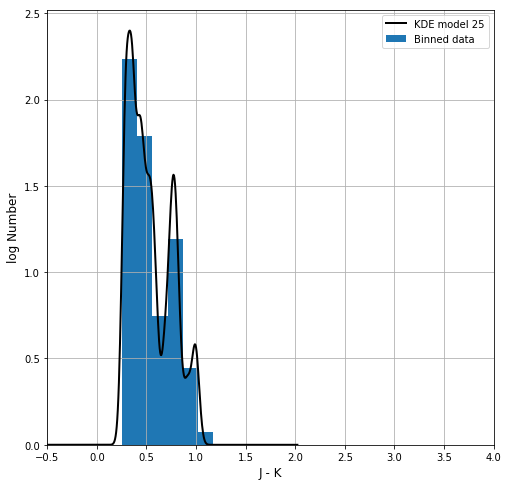

In [65]:
# 65

# Bin 25 (K_0 = 13.643 to 13.229) <- triple-wide bin
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 25')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.64, 0.66)
#plt.ylim(0.5, 0.55)
#plt.xlim(0.85, 0.96)
#plt.ylim(1.3, 1.42)
#plt.xlim(1.48,1.53)
#plt.ylim(0.0, 0.001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 13.436
### boundary 1: J-K = 0.650
### boundary 2: J-K = 1.000
### boundary 3: J-K = 2.000
### boundary 4: J-K = 2.500

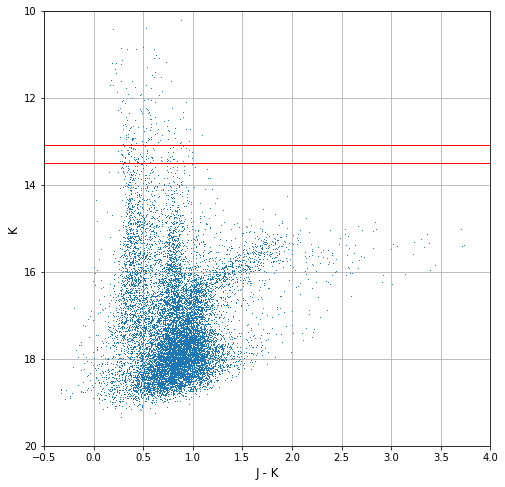

83
0.14800000000000002


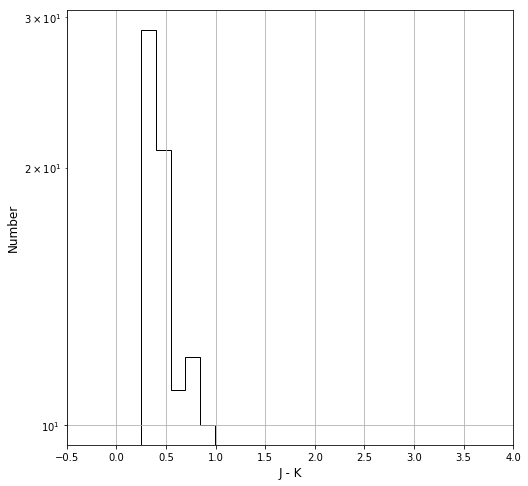

In [66]:
# 66

# Bin 26 (K_0 = 13.505 to 13.091) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=13.505, linewidth=1.0, color='red') # Bin 26 - lower boundary
plt.axhline(y=13.091, linewidth=1.0, color='red') # Bin 26 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 13.505) & (color_cuts.Kmag > 13.091)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

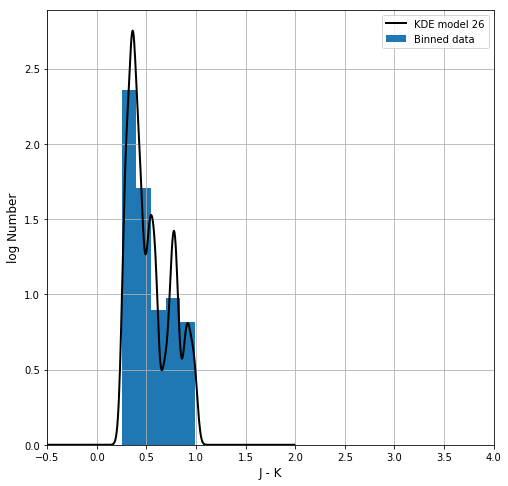

In [67]:
# 67

# Bin 26 (K_0 = 13.505 to 13.091) <- triple-wide bin
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 26')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.655, 0.66)
#plt.ylim(0.475, 0.525)
#plt.xlim(0.85, 0.96)
#plt.ylim(1.3, 1.42)
#plt.xlim(1.48,1.53)
#plt.ylim(0.0, 0.001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 13.298
### boundary 1: J-K = 0.657
### boundary 2: J-K = 1.200
### boundary 3: J-K = 2.000
### boundary 4: J-K = 2.500

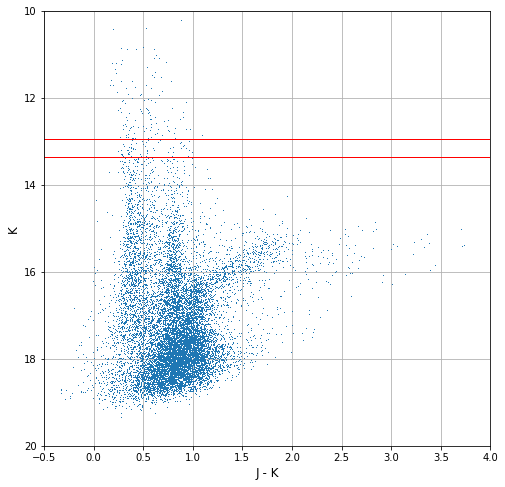

62
0.1478


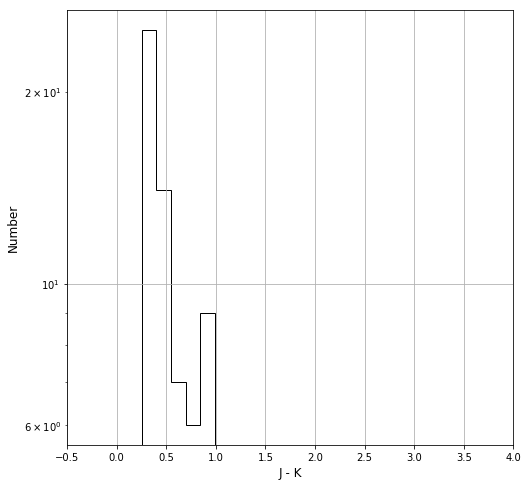

In [68]:
# 68

# Bin 27 (K_0 = 13.367 to 12.953) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=13.367, linewidth=1.0, color='red') # Bin 27 - lower boundary
plt.axhline(y=12.953, linewidth=1.0, color='red') # Bin 27 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 13.367) & (color_cuts.Kmag > 12.953)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

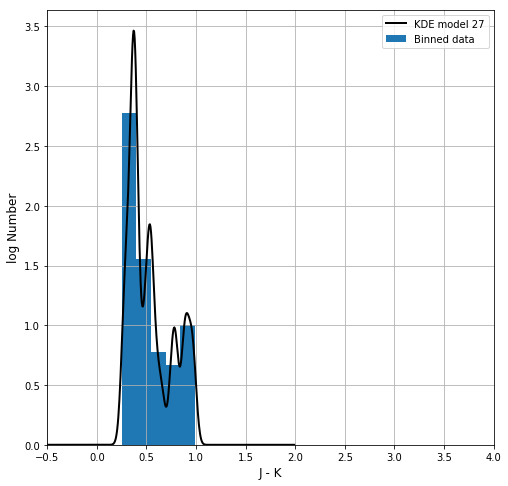

In [69]:
# 69

# Bin 27 (K_0 = 13.367 to 12.953) <- triple-wide bin
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 27')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.69, 0.71)
#plt.ylim(0.3, 0.35)
#plt.xlim(0.85, 0.96)
#plt.ylim(1.3, 1.42)
#plt.xlim(1.48,1.53)
#plt.ylim(0.0, 0.001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 13.160
### boundary 1: J-K = 0.700
### boundary 2: J-K = 1.300
### boundary 3: J-K = 2.000
### boundary 4: J-K = 2.500

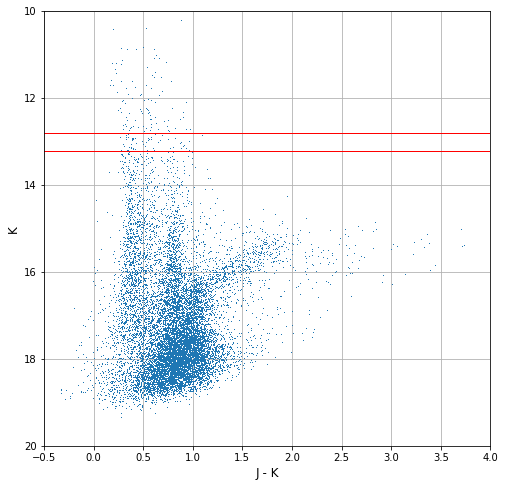

58
0.137


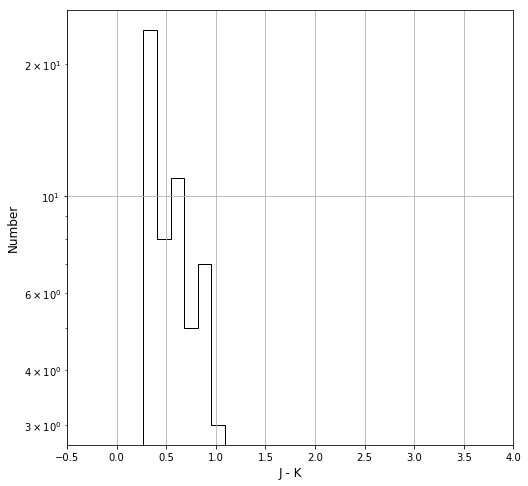

In [70]:
# 70

# Bin 28 (K_0 = 13.229 to 12.815) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
plt.axhline(y=13.229, linewidth=1.0, color='red') # Bin 28 - lower boundary
plt.axhline(y=12.815, linewidth=1.0, color='red') # Bin 28 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of K-band magnitudes over which the bin is sampling
# from the catalog of sources with K-mag and J-mag errors less than 0.1.
#
jMINUSkHIST = color_cuts[(color_cuts.Kmag < 13.229) & (color_cuts.Kmag > 12.815)]
#print jMINUSkHIST
print len(jMINUSkHIST)
#
binwidth = stats.knuth_bin_width(jMINUSkHIST.jMINUSk)
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth/1.0, binwidth/1.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

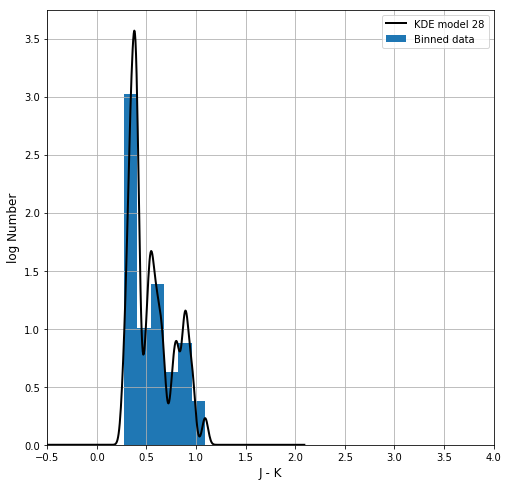

In [71]:
# 71

# Bin 28 (K_0 = 13.229 to 12.815)
#
kde_data = jMINUSkHIST.jMINUSk.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.0, binwidth/1.0)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 28')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.72, 0.725)
#plt.ylim(0.35, 0.375)
#plt.xlim(0.85, 0.96)
#plt.ylim(1.3, 1.42)
#plt.xlim(1.48,1.53)
#plt.ylim(0.0, 0.001)
plt.legend()
plt.xlabel('J - K', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: K_0 = 13.022
### boundary 1: J-K = 0.723
### boundary 2: J-K = 1.400
### boundary 3: J-K = 2.000
### boundary 4: J-K = 2.500

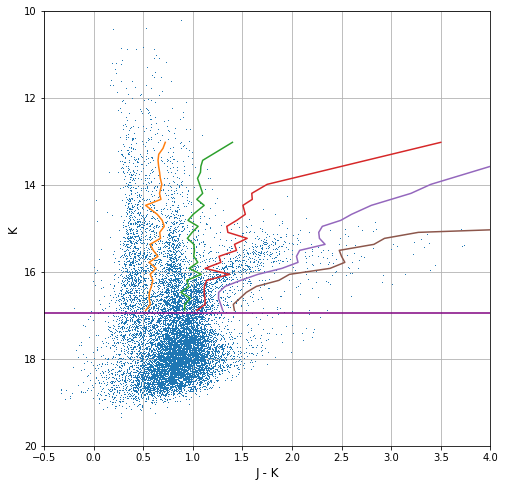

In [72]:
# K vs J-K
# CMD with color-cut points and lines
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
### plot points
yvalues1 = [16.886, 16.748, 16.610, 16.472, 16.334, 16.196, 16.058, 15.920, 15.782, 15.644, 15.506, 15.368, 15.230, 15.092, 14.954, 14.816, 14.678, 14.471, 14.333, 14.195, 13.988, 13.850, 13.712, 13.574, 13.436, 13.298, 13.160, 13.022]
boundary1 = [0.526, 0.571, 0.561, 0.562, 0.583, 0.597, 0.571, 0.629, 0.560, 0.649, 0.602, 0.570, 0.675, 0.667, 0.713, 0.692, 0.642, 0.525, 0.679, 0.665, 0.688, 0.673, 0.666, 0.656, 0.650, 0.657, 0.700, 0.723]
boundary2 = [0.918, 0.919, 0.976, 0.880, 0.959, 0.939, 1.086, 0.965, 1.051, 1.010, 1.017, 1.011, 0.946, 0.994, 1.054, 0.952, 1.004, 1.115, 1.041, 1.100, 1.069, 1.048, 1.078, 1.082, 1.100, 1.200, 1.300, 1.400]
boundary3 = [1.040, 1.125, 1.122, 1.115, 1.117, 1.140, 1.371, 1.125, 1.283, 1.265, 1.441, 1.421, 1.549, 1.354, 1.343, 1.443, 1.530, 1.506, 1.600, 1.595, 1.750, 2.000, 2.250, 2.500, 2.750, 3.000, 3.250, 3.500]
boundary4 = [1.302, 1.282, 1.260, 1.261, 1.327, 1.483, 1.656, 1.899, 2.061, 2.046, 2.078, 2.334, 2.277, 2.270, 2.306, 2.492, 2.600, 2.800, 3.000, 3.200, 3.400, 3.600, 3.800, 4.000, 4.200, 4.400, 4.600, 4.800]
boundary5 = [1.420, 1.409, 1.475, 1.540, 1.642, 1.868, 1.974, 2.384, 2.533, 2.500, 2.477, 2.826, 2.933, 3.274, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000]
#
plt.plot(boundary1, yvalues1)
plt.plot(boundary2, yvalues1)
plt.plot(boundary3, yvalues1)
plt.plot(boundary4, yvalues1)
plt.plot(boundary5, yvalues1)
plt.axhline(y=16.955, linewidth=1.5, color='purple') # TRGB threshold
#
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('K_vs_J-K_color-cuts.pdf')
